In [2]:
import sys
sys.path.append('../training_performance')

import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read

from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du

from plot_trials_info import *
from plot_days_info import *

import seaborn as sns
import pandas as pd
# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

[2023-09-27 09:36:39,922][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2023-09-27 09:36:40,404][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [3]:
animals = [
    "R010",
    "R011",
    "R012",
    "R013",
    "R014",
    "R015",
    "R512",
    "R513",
    "R621",
    "R622",
    "R623",
    "R624",
    "C214",
    "C215",
    "C220",
    "C221",
    "C222",
    "C223",
]

n_animals = len(animals)
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=25)
trials_df = create_trials_df_from_dj(
    animal_ids=animals, date_min=date_min, date_max=date_max
)

Not all variables are the same length. Cannot create proper DataFrame
result: 9
hits: 9
violations: 9
temperror: 9
hit_rate: 8
error_rate: 8
violation_rate: 8
temp_error_rate: 8
n_lpokes: 8
n_cpokes: 8
n_rpokes: 8
trial_dur: 8
trial_start: 8
valid_early_spoke: 8
first_spoke: 8
first_lpoke: 8
first_rpoke: 8
n_settling_ins: 8
avg_settling_in: 8
cpoke_dur: 8
stage: 8
curriculum: 8
sides: 9
SMA_set: 8
is_match: 9
sa: 8
sb: 8
stimuli_on: 8
settling_in_dur: 8
legal_cbreak_dur: 8
pre_dur: 8
adj_pre_dur: 8
stimulus_dur: 8
delay_dur: 8
post_dur: 8
sb_extra_dur: 8
viol_off_dur: 8
pre_go_dur: 8
inter_trial_dur: 8
go_type: 8
go_dur: 8
give_type_set: 8
give_type_imp: 8
give_frac: 8
give_delay_dur: 8
give_xtra_light_delay_dur: 8
give_use: 9
replay_on: 8
timeouts: 9
water_delivered: 9
give_water_not_drunk: 9
crash_hist: 8
was_block_swtich: 8
volume_multiplier: 8
l_water_vol: 8
r_water_vol: 8
ab_l_prob: 8
ab_r_prob: 8
ab_beta: 8
ab_tau: 8
exp_del_tau: 8
exp_del_min: 8
exp_del_max: 8
session 927302 df 

In [15]:
list(stage_10_animals)

['R011',
 'R012',
 'R013',
 'R014',
 'R015',
 'R512',
 'R513',
 'R621',
 'R622',
 'R623',
 'R624',
 'C215',
 'C221',
 'C222']

In [16]:
stage_10_animals = trials_df.query("stage > 9").animal_id.unique()
days_df = create_days_df_from_dj(
    animal_ids=list(stage_10_animals), date_min=date_min, date_max=date_max
)
f_name = "stage_10_days_df.csv"

days_df.to_csv(f_name, index=False)

In [34]:
def mutliplot_rule_learning(animal_id, days_df, trials_df):
    """
    params
    ------
    animal_id : str
        animal id to plot, e.g. "R610"
    days_df : pd.DataFrame
        days dataframe created by create_days_df_from_dj() with
        day as row index
    trials_df : pd.DataFrame
        trials dataframe created by create_trials_df_from_dj() with
        trial as row index

    """
    layout = """
        AAABBB
        CCCDDD
        EEEFFF
    """

    fig = plt.figure(constrained_layout=True, figsize=(23, 13))
    ax_dict = fig.subplot_mosaic(layout)  # ax to plot to
    plt.suptitle(f"{animal_id} Rule Learning Summary Plot", fontweight="semibold")

    animal_days_df = days_df.query("animal_id == @animal_id").copy()
    animal_trials_df = trials_df.query("animal_id == @animal_id").copy()

    ## ROW 1
    plot_performance(
        animal_days_df, ax_dict["A"], title="Performance", xaxis_label=False
    )
    plot_trial_structure(
        animal_trials_df, ax_dict["B"], title="Trial Structure", xaxis_label=False
    )

    ## ROW 2
    plot_performance_bars(
        animal_trials_df, ax_dict["C"], title="Performance", xaxis_label=False
    )
    plot_side_bias(animal_days_df, ax_dict["D"], title="Side Bias", xaxis_label=False)

    ## ROW 3
    plot_performance_by_give(
        animal_trials_df, ax_dict["E"], title="Give Metrics", xaxis_label=True
    )

    plot_non_give_stim_performance(
        animal_trials_df, ax_dict["F"], title="Non-Give Perf", xaxis_label=True
    )

    return None

/Users/jessbreda/Desktop/github/jbreda_animal_training/code/meetings/../training_performance/plot_days_info.py:943: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/jessbreda/Desktop/github/jbreda_animal_training/code/meetings/../training_performance/plot_days_info.py:943: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


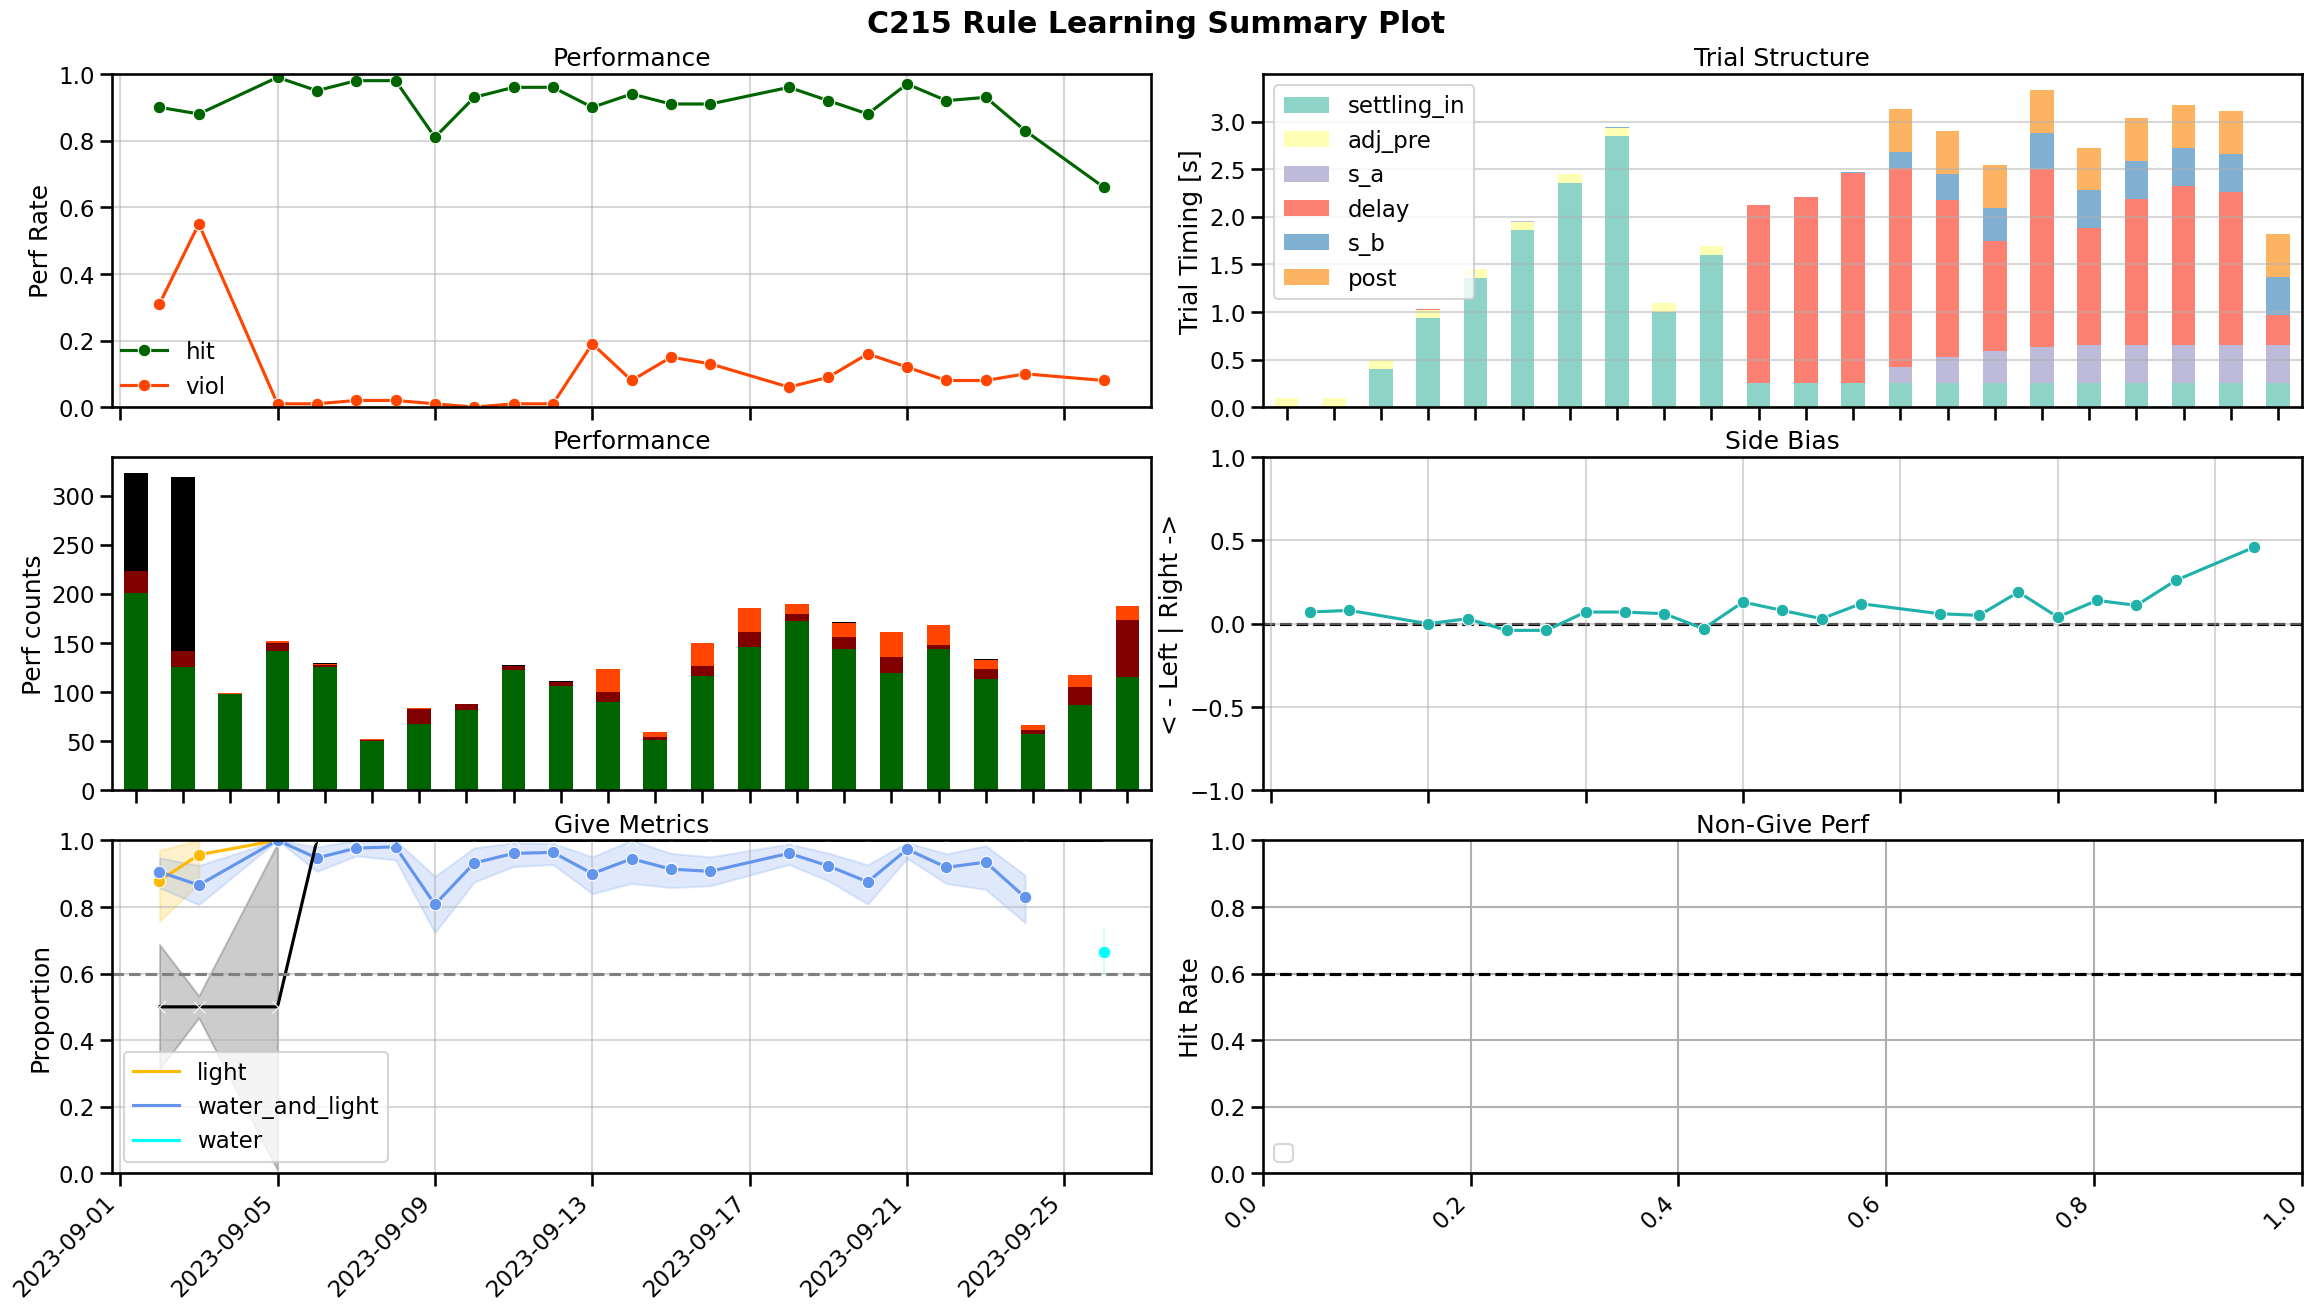

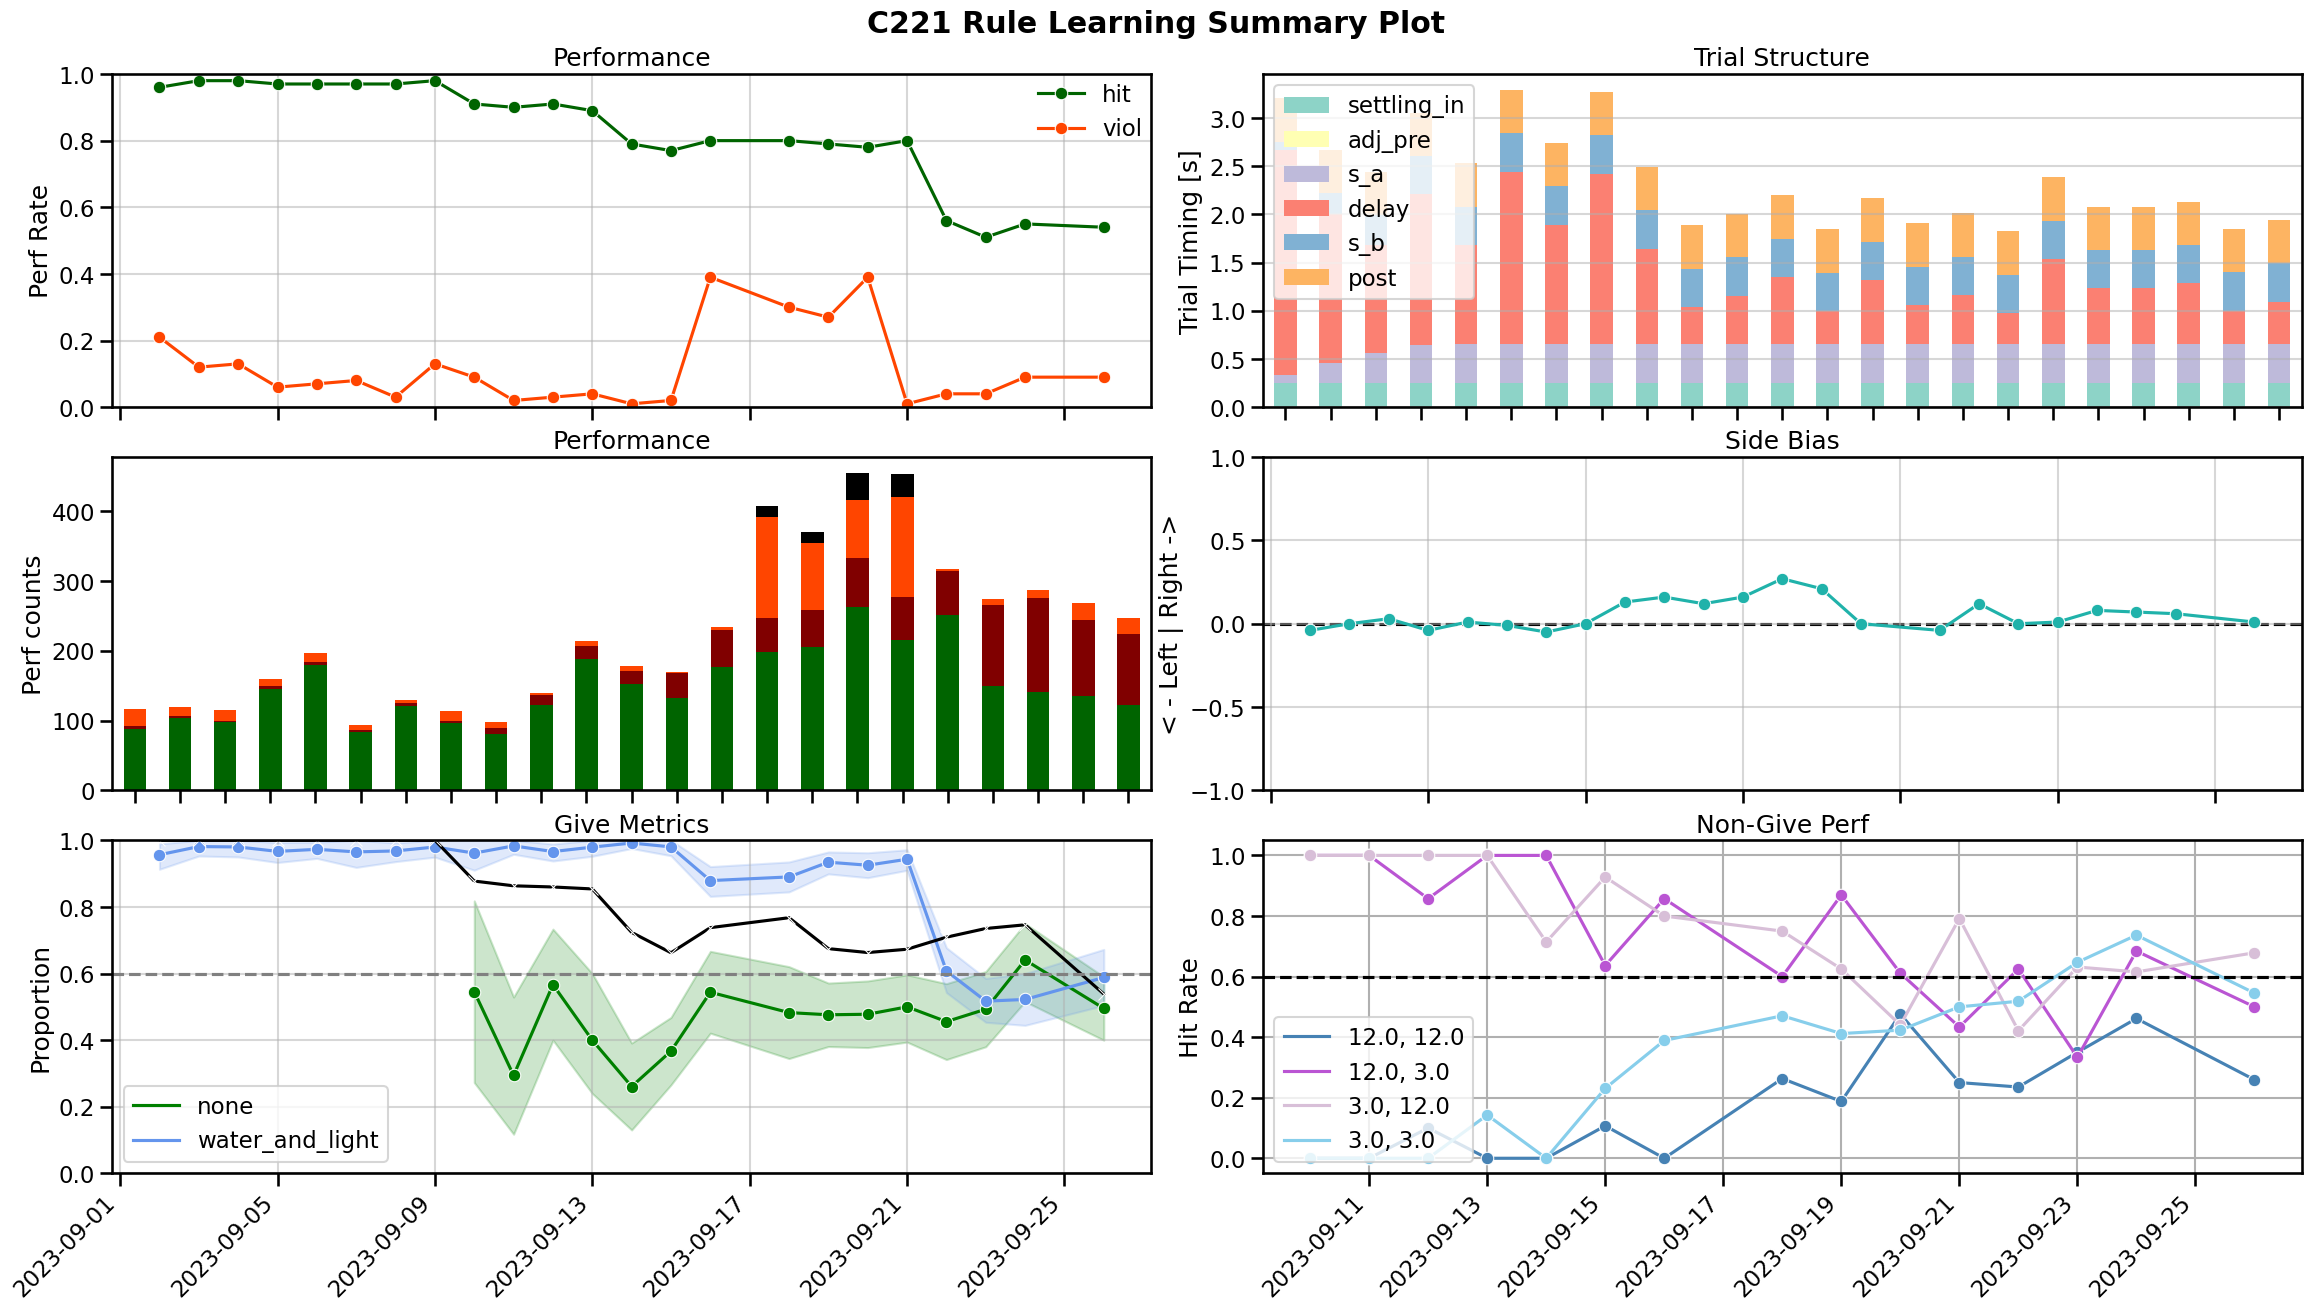

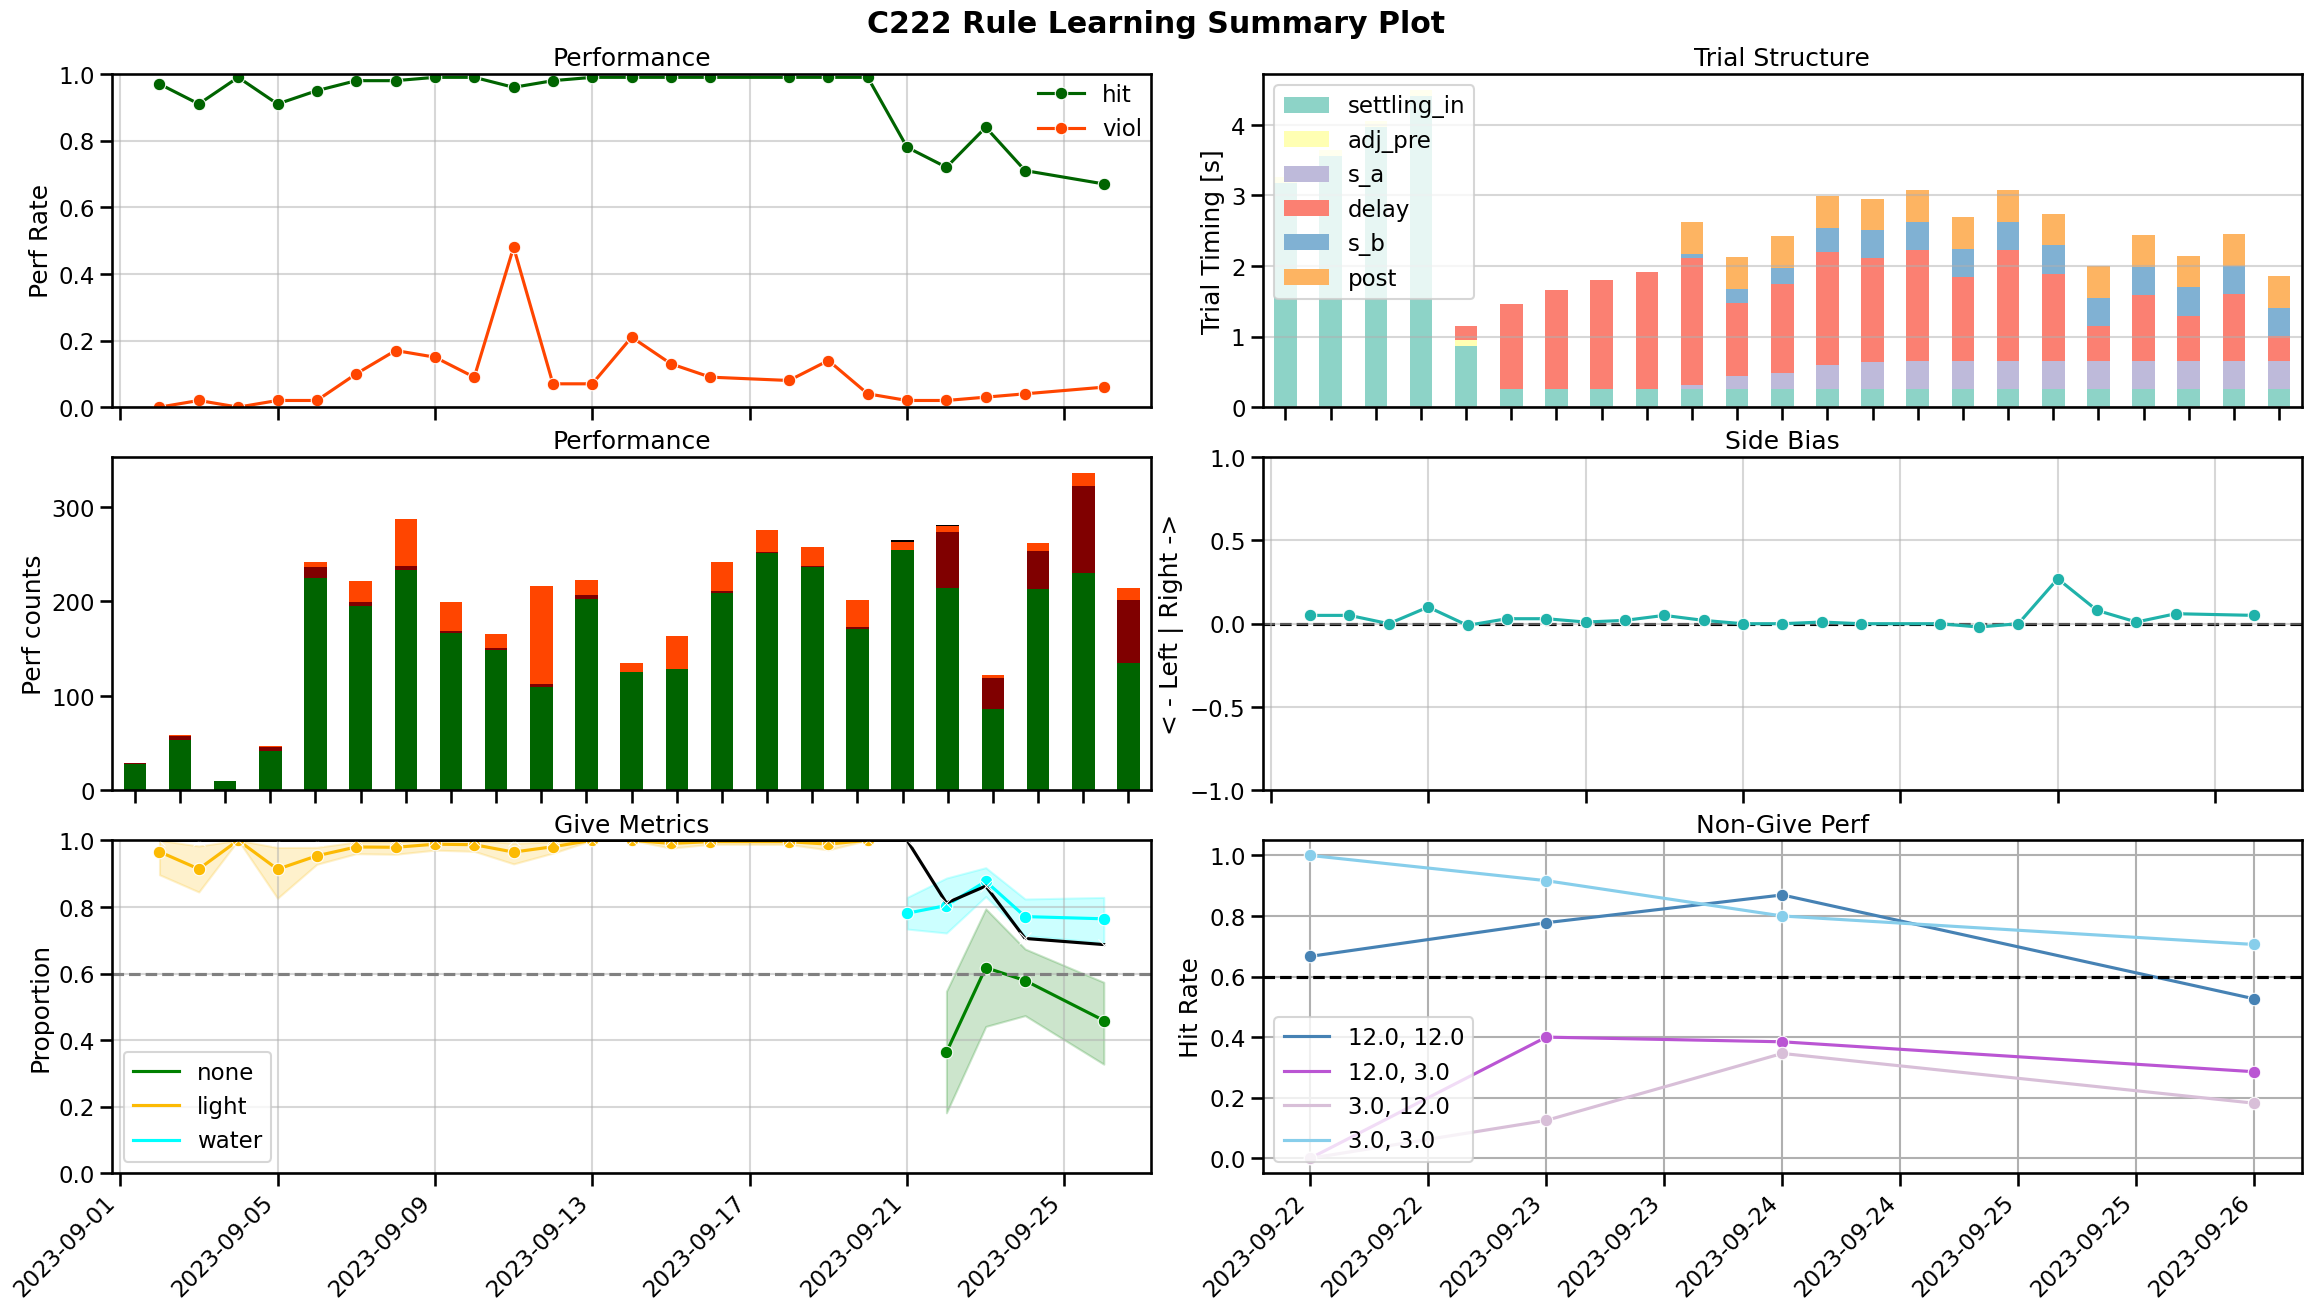

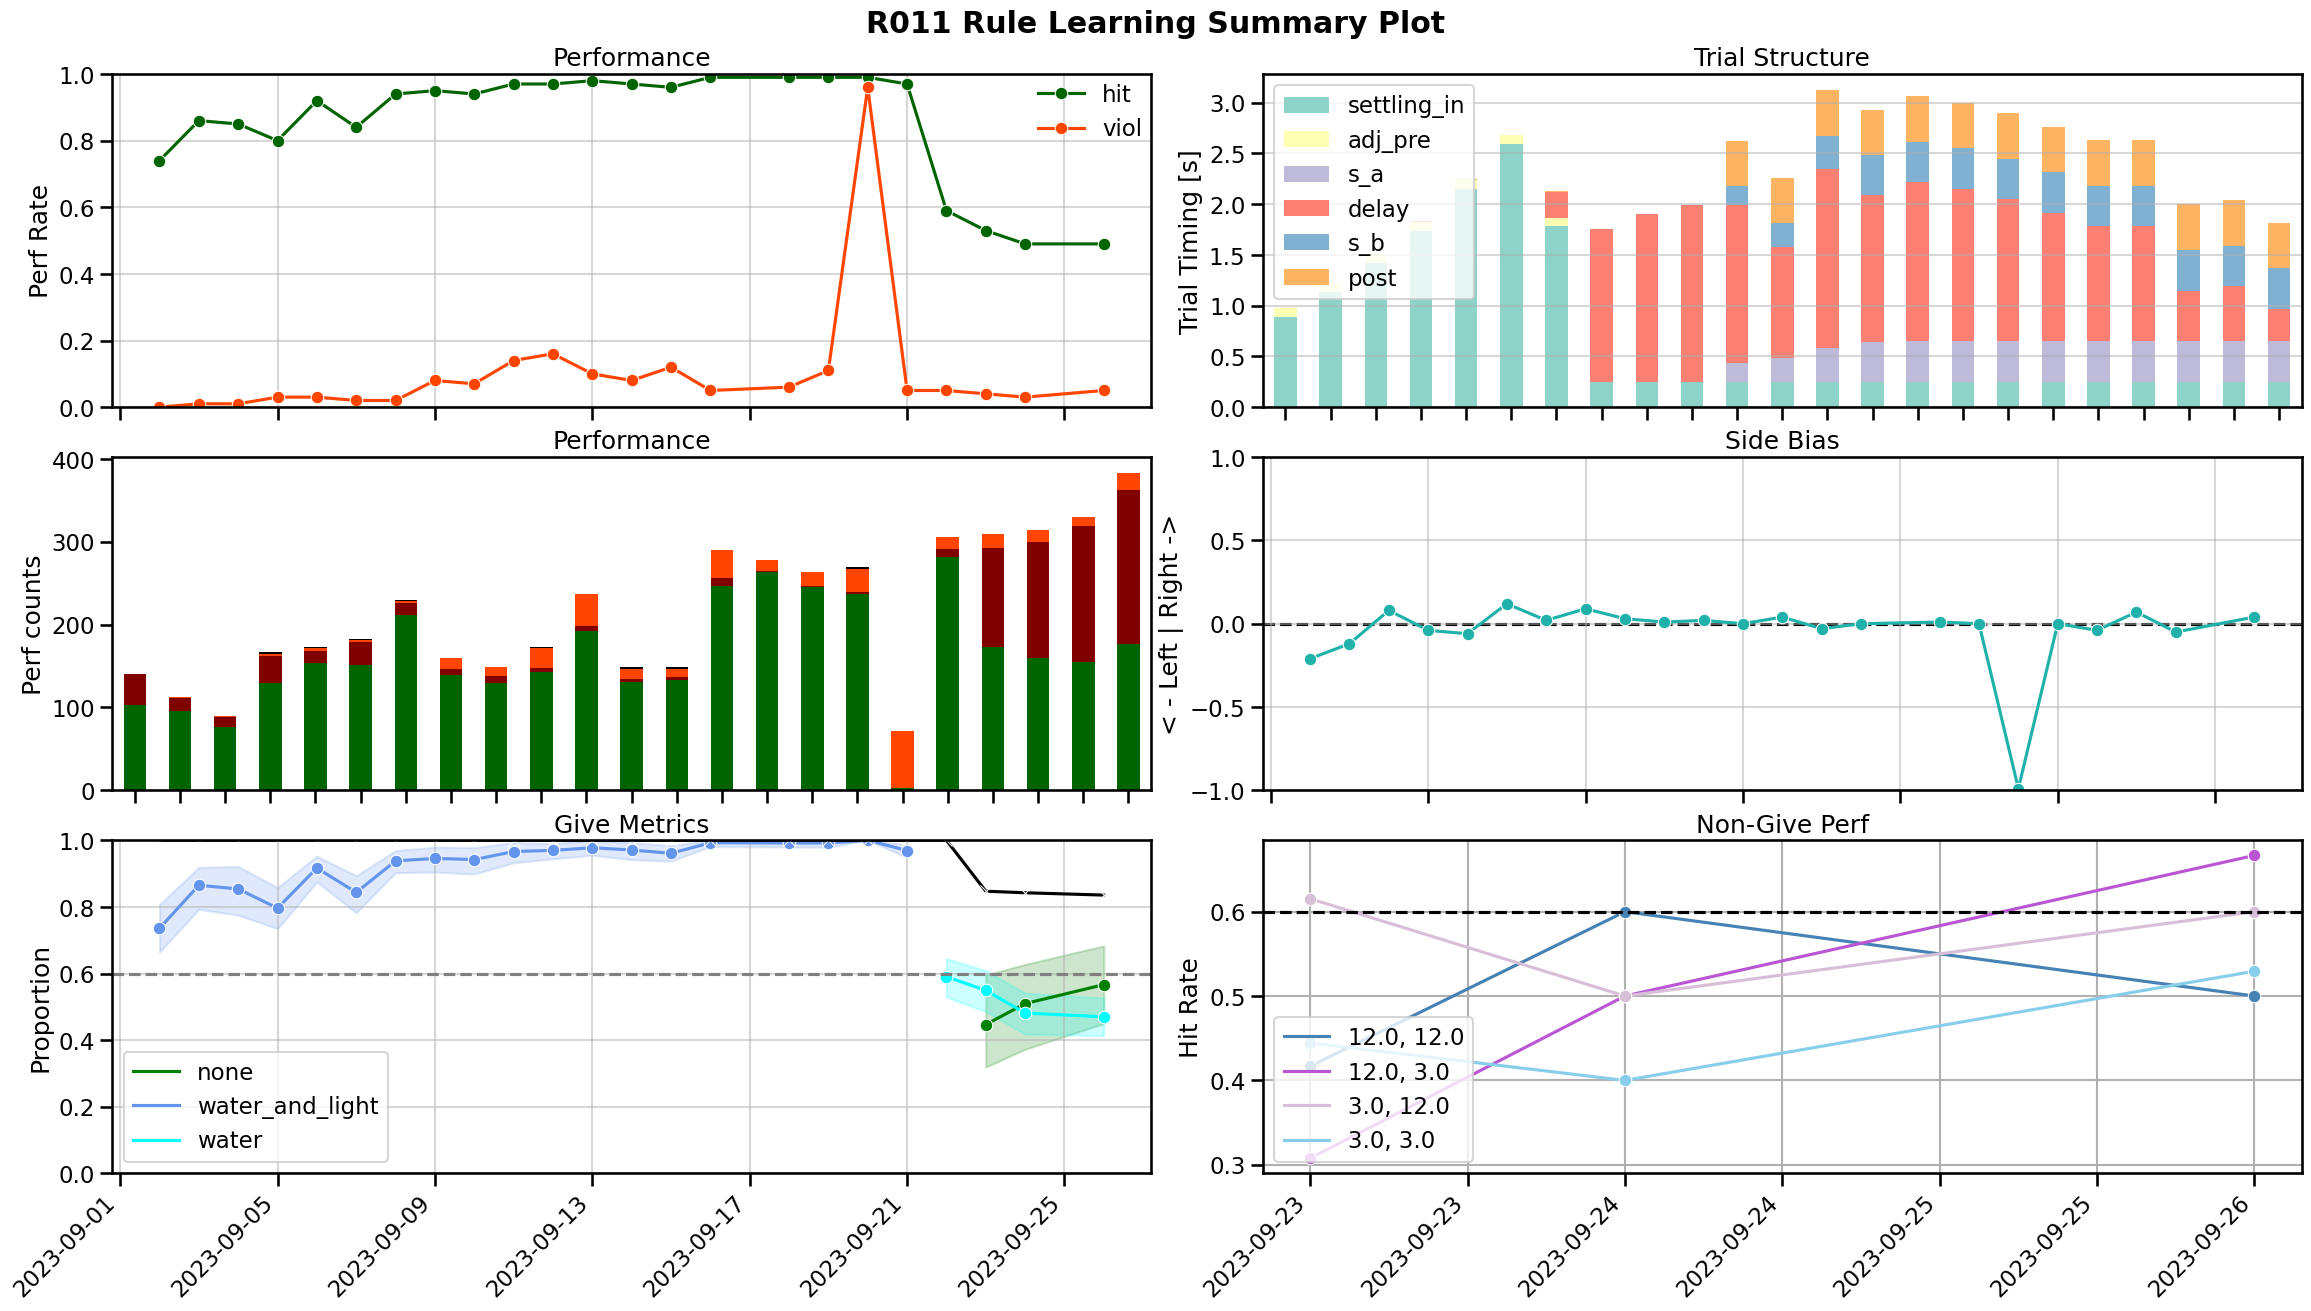

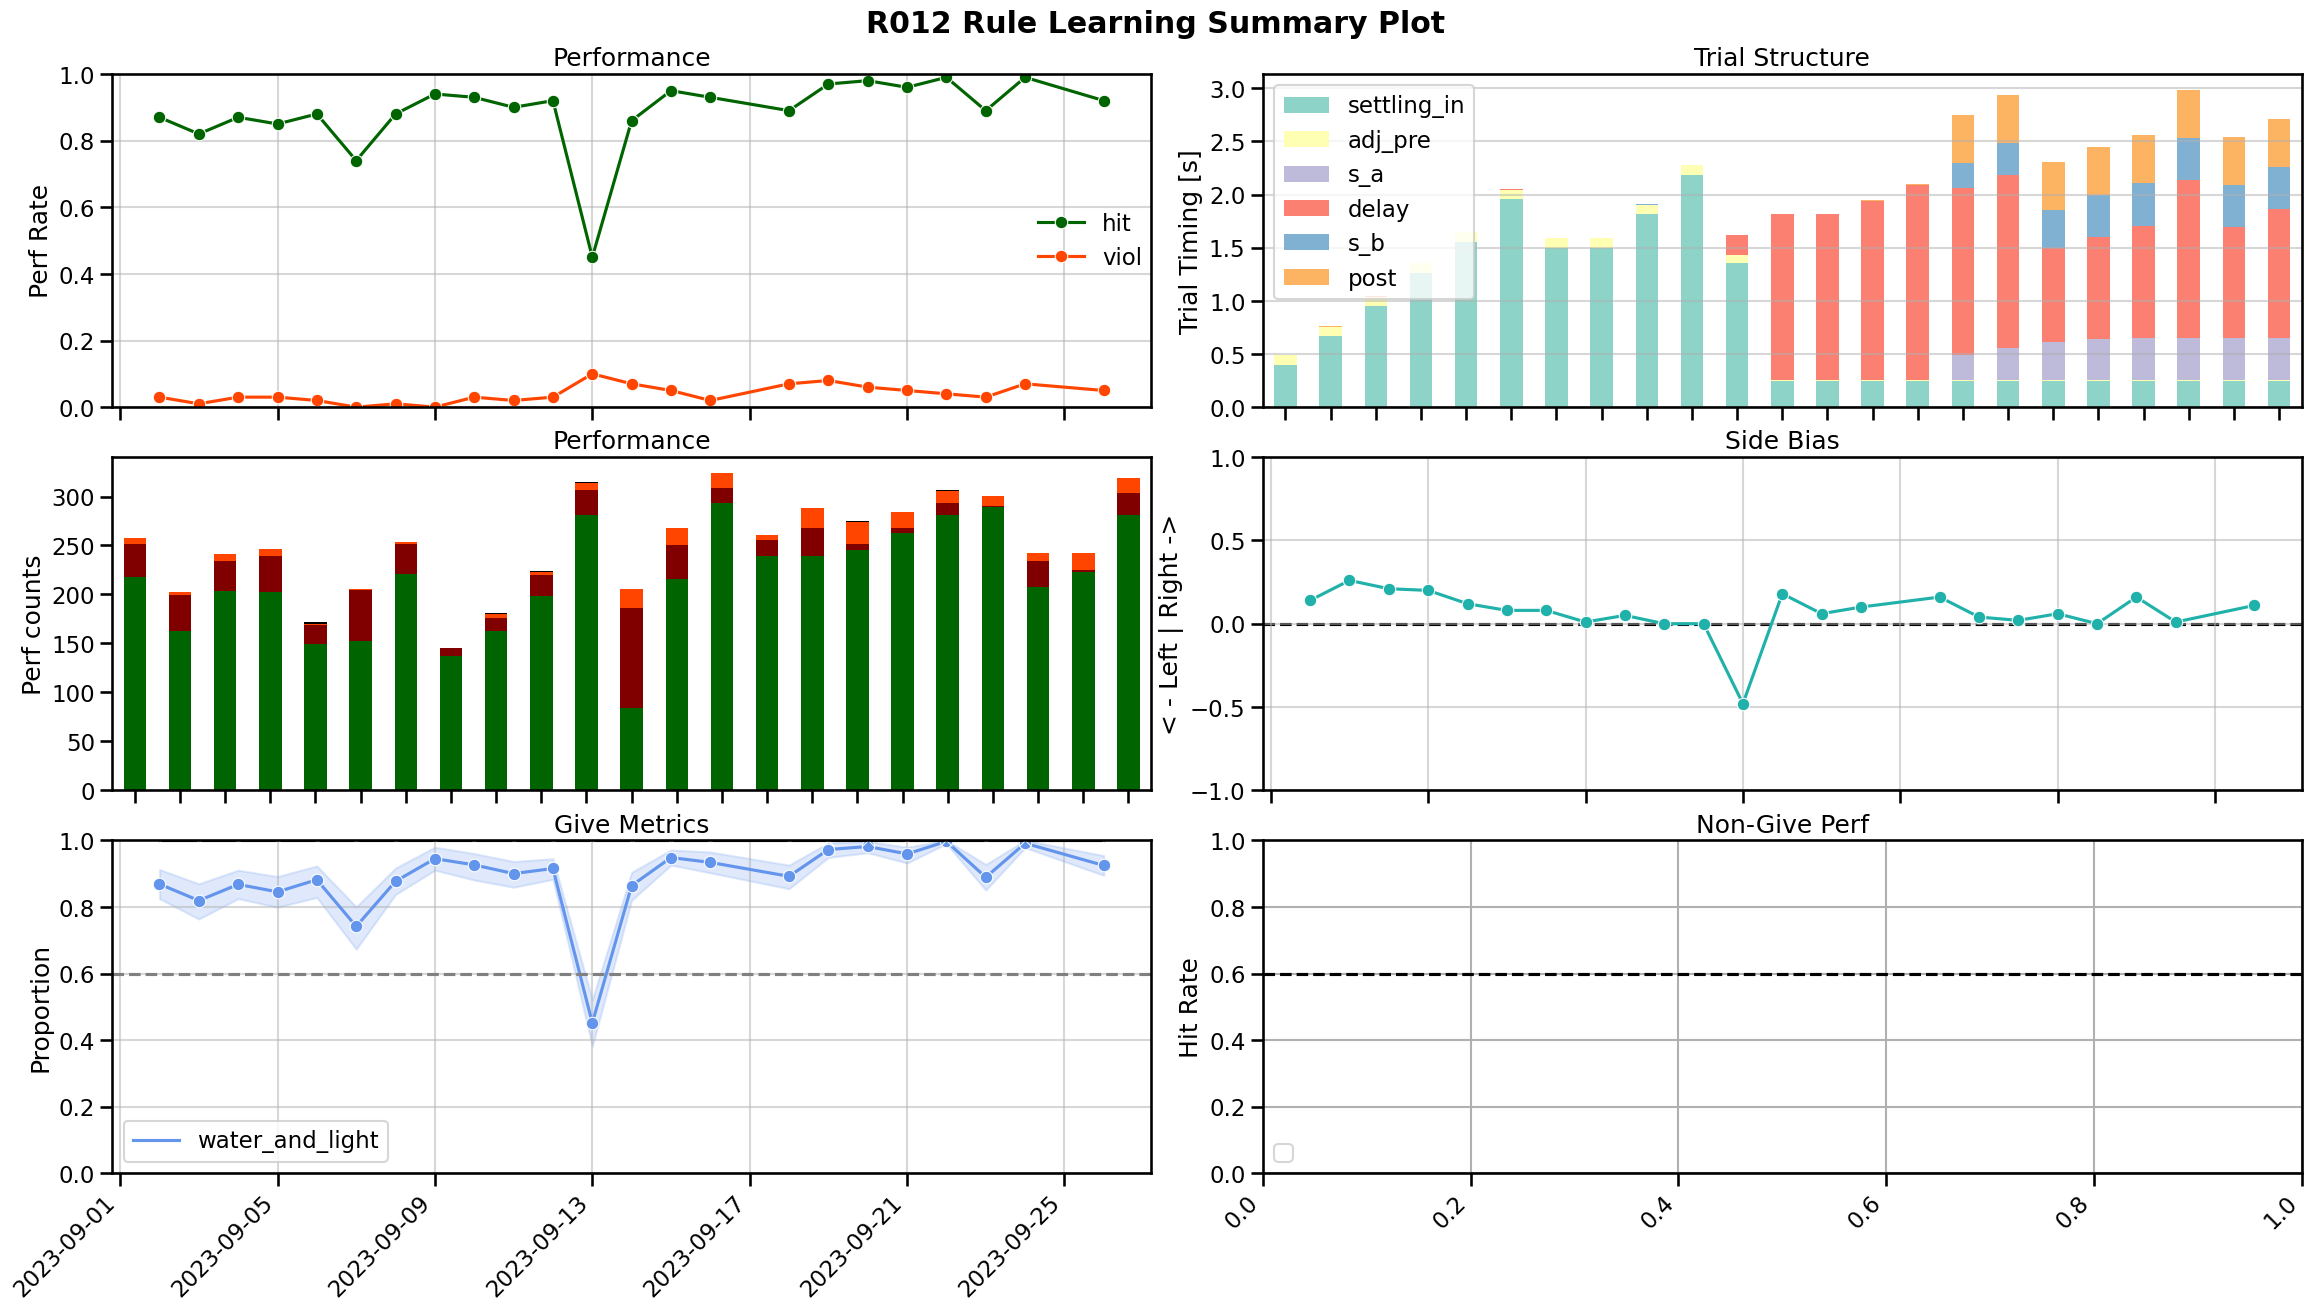

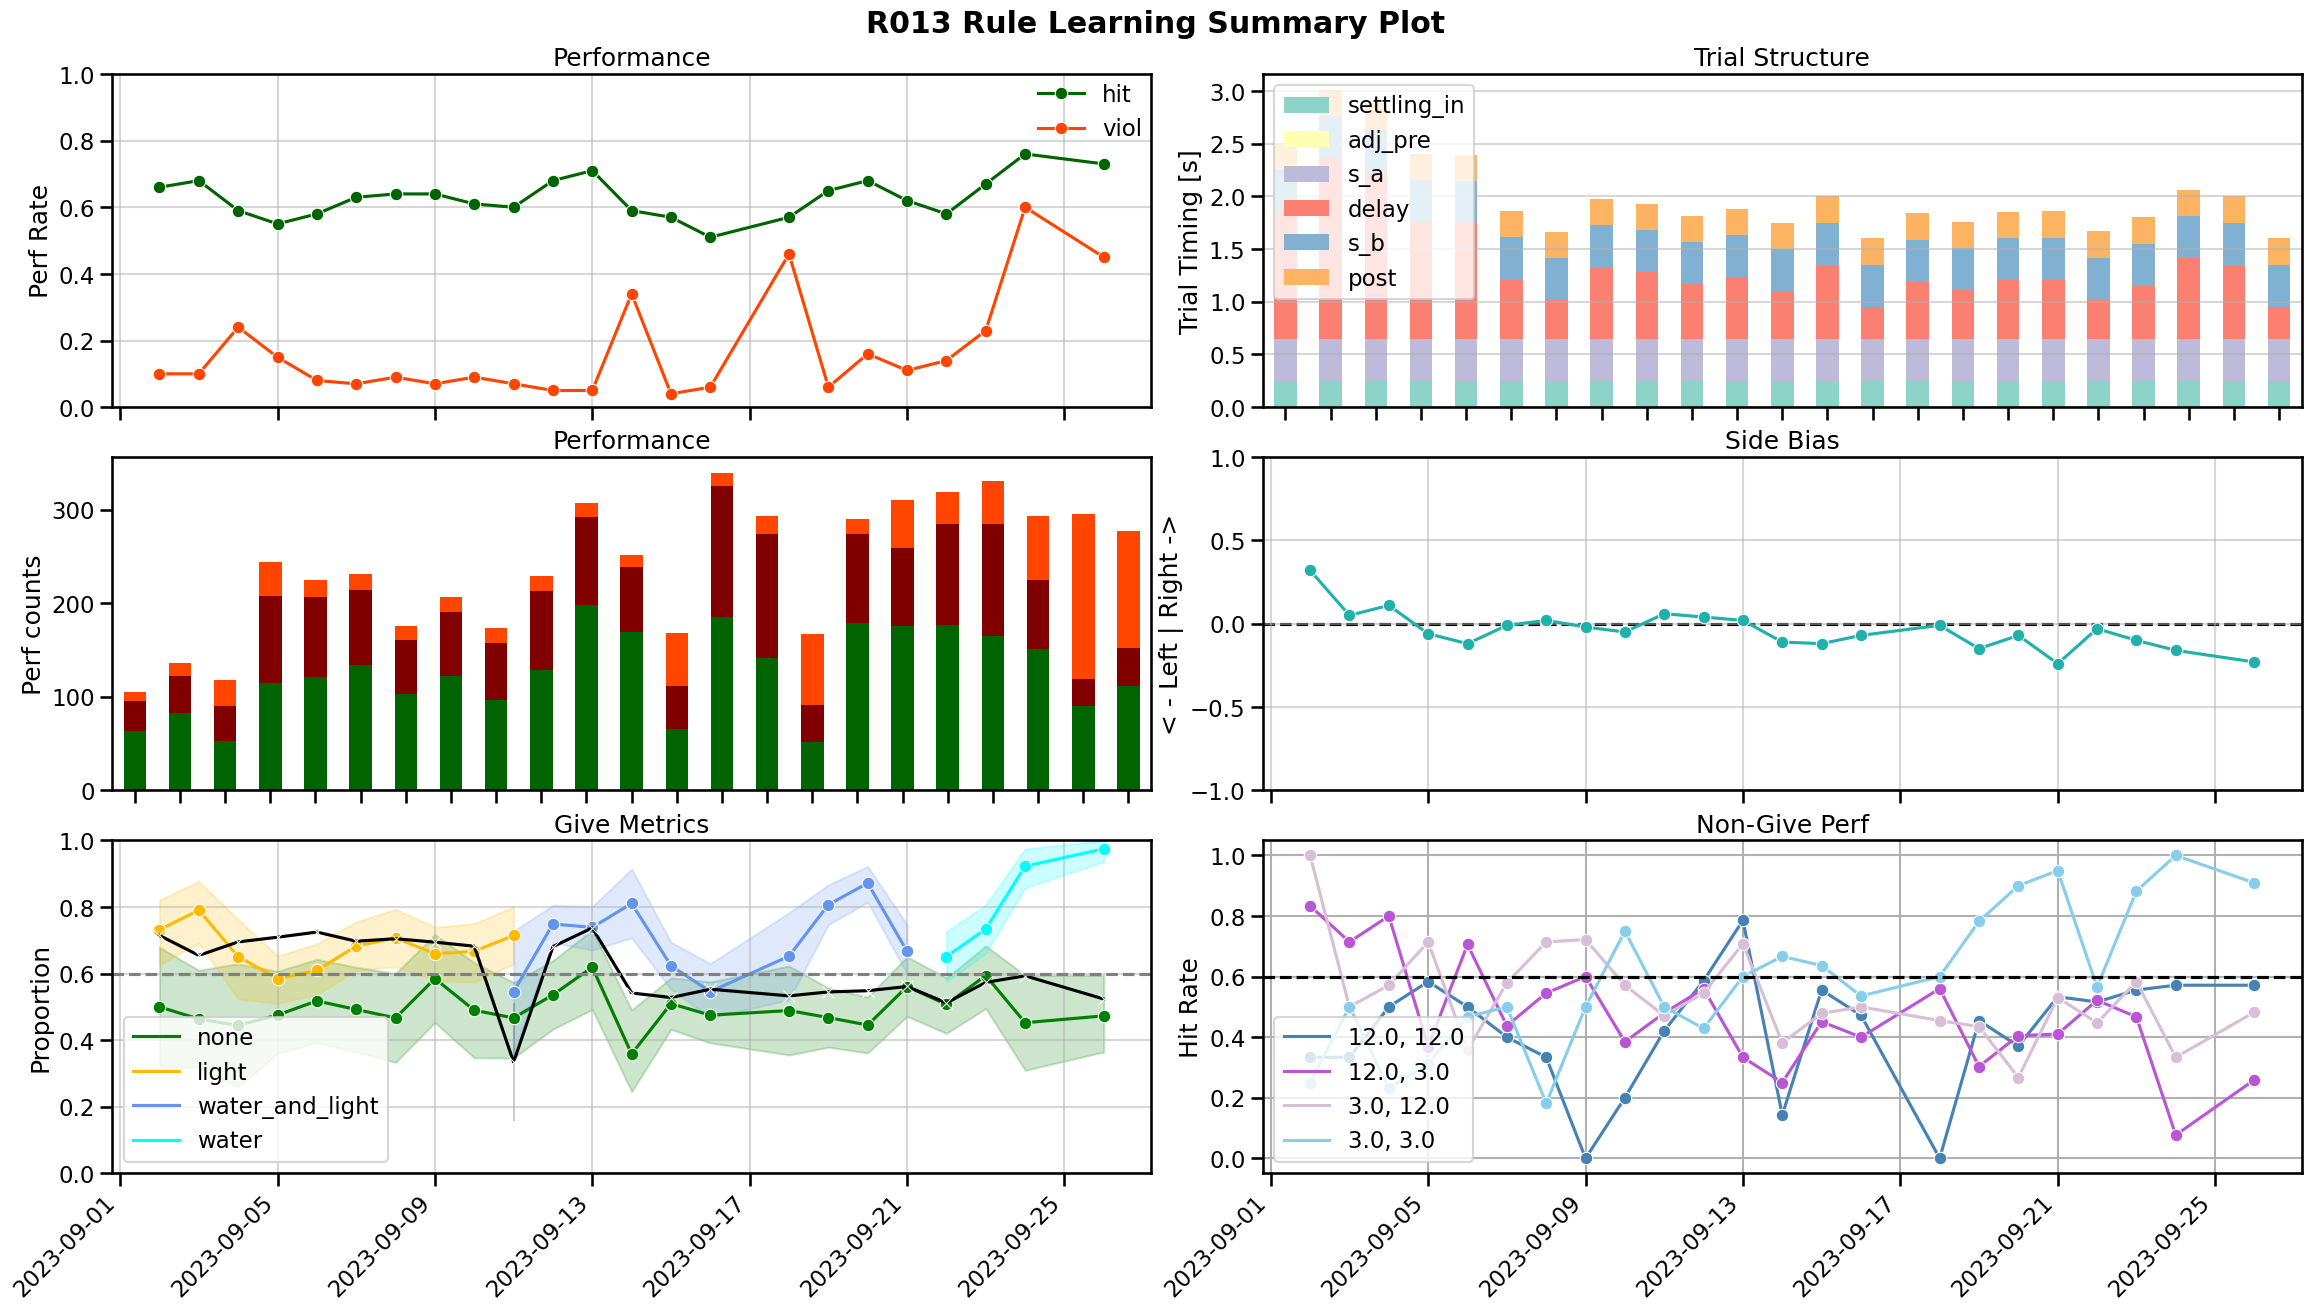

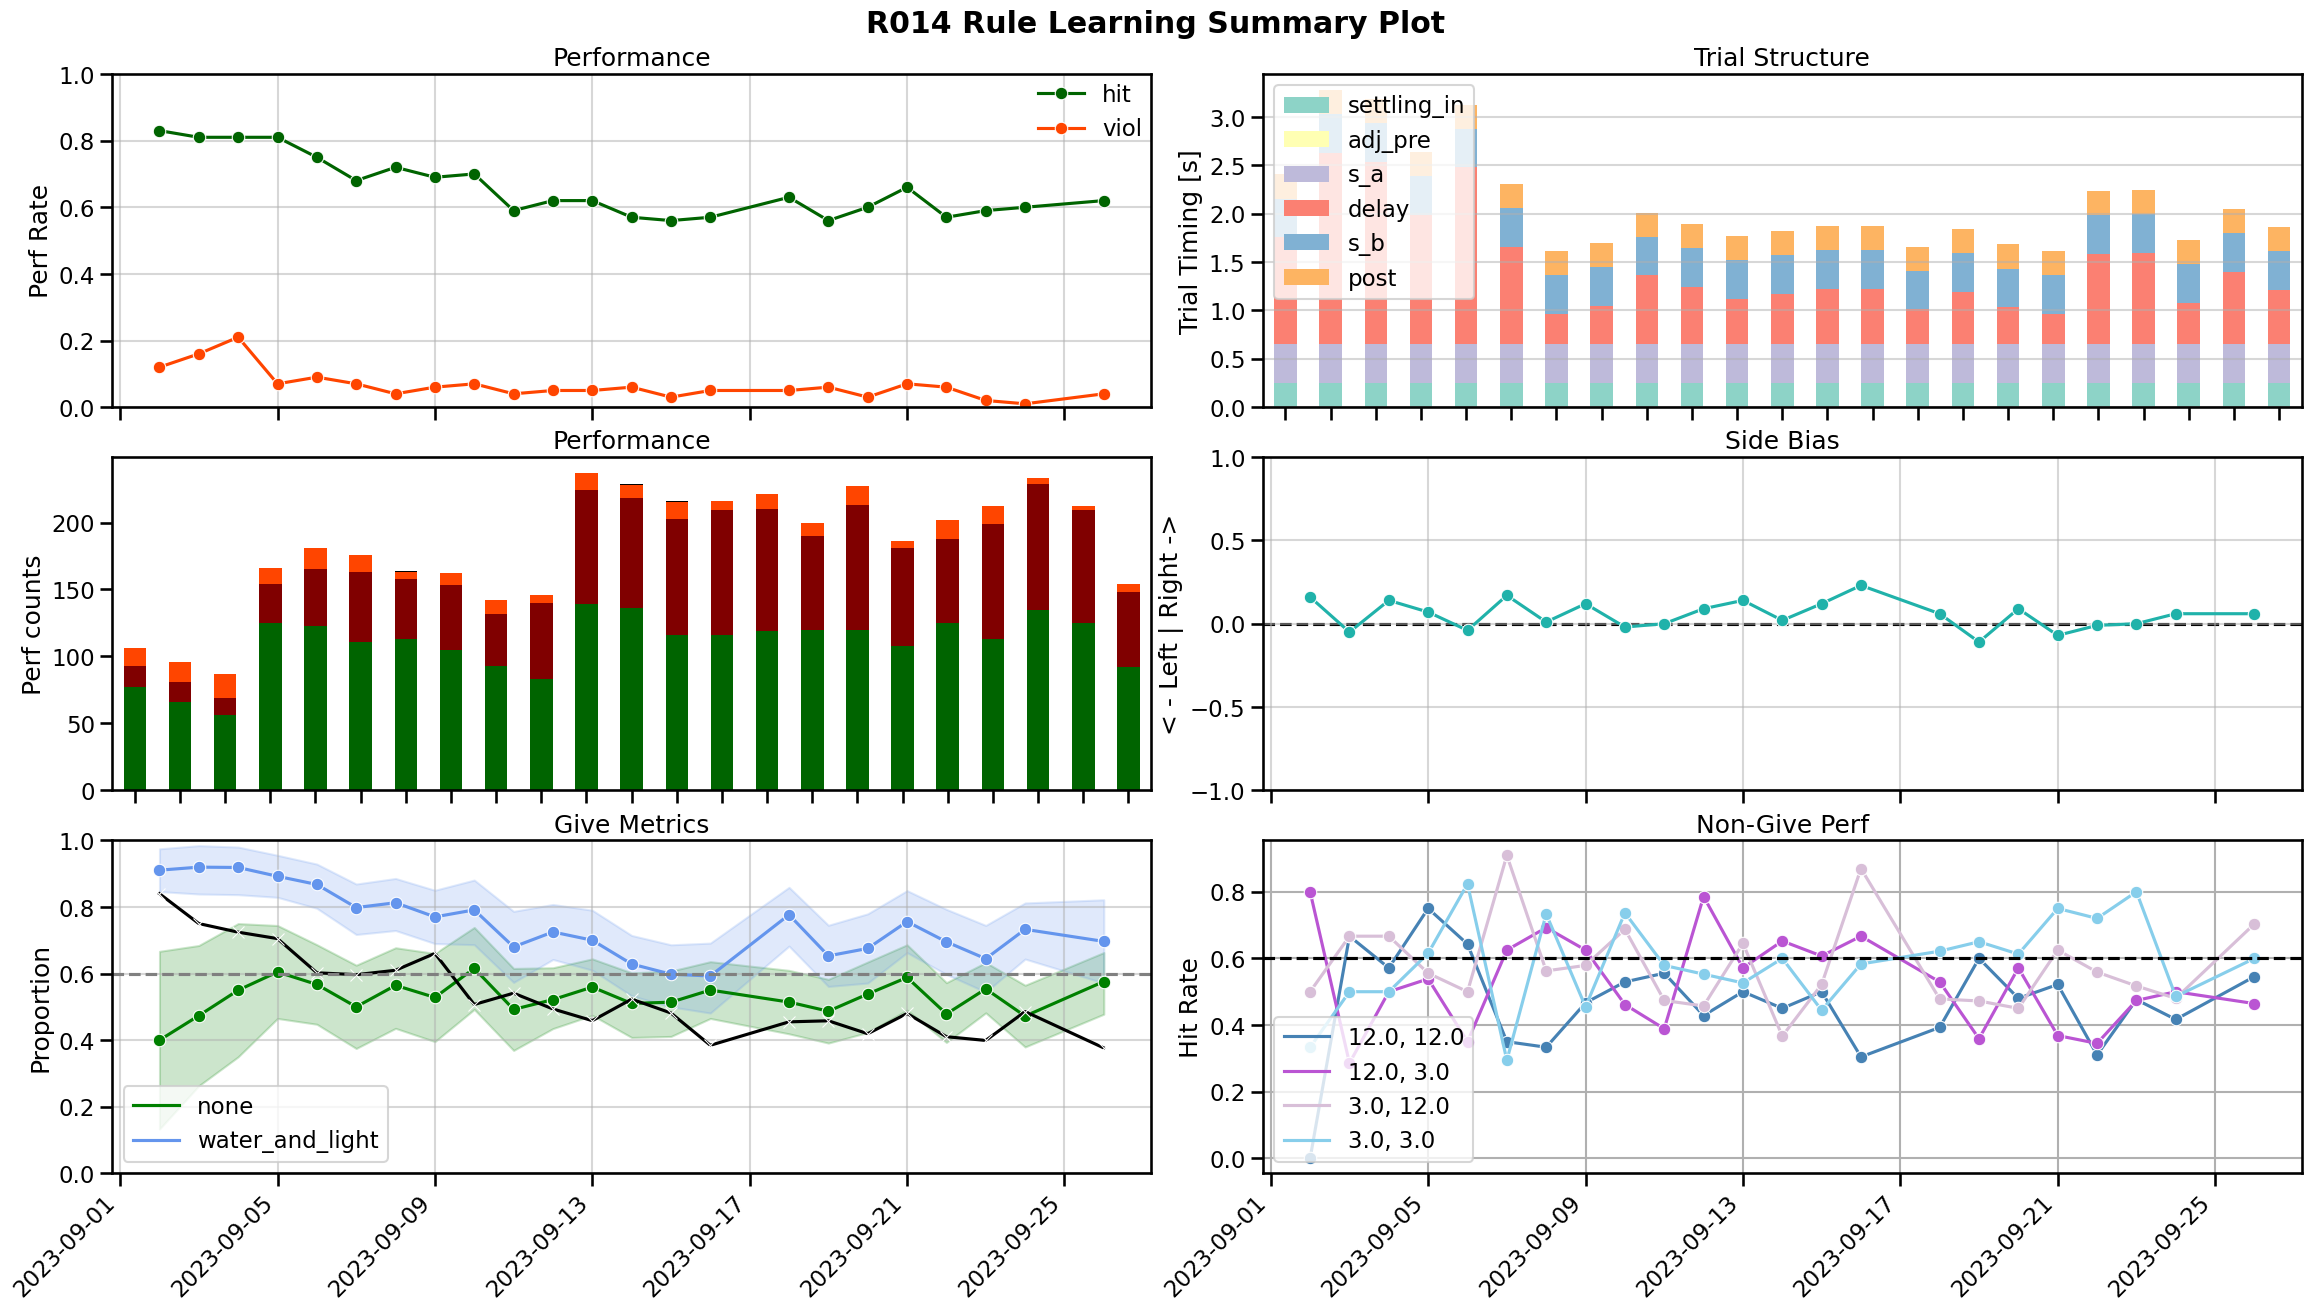

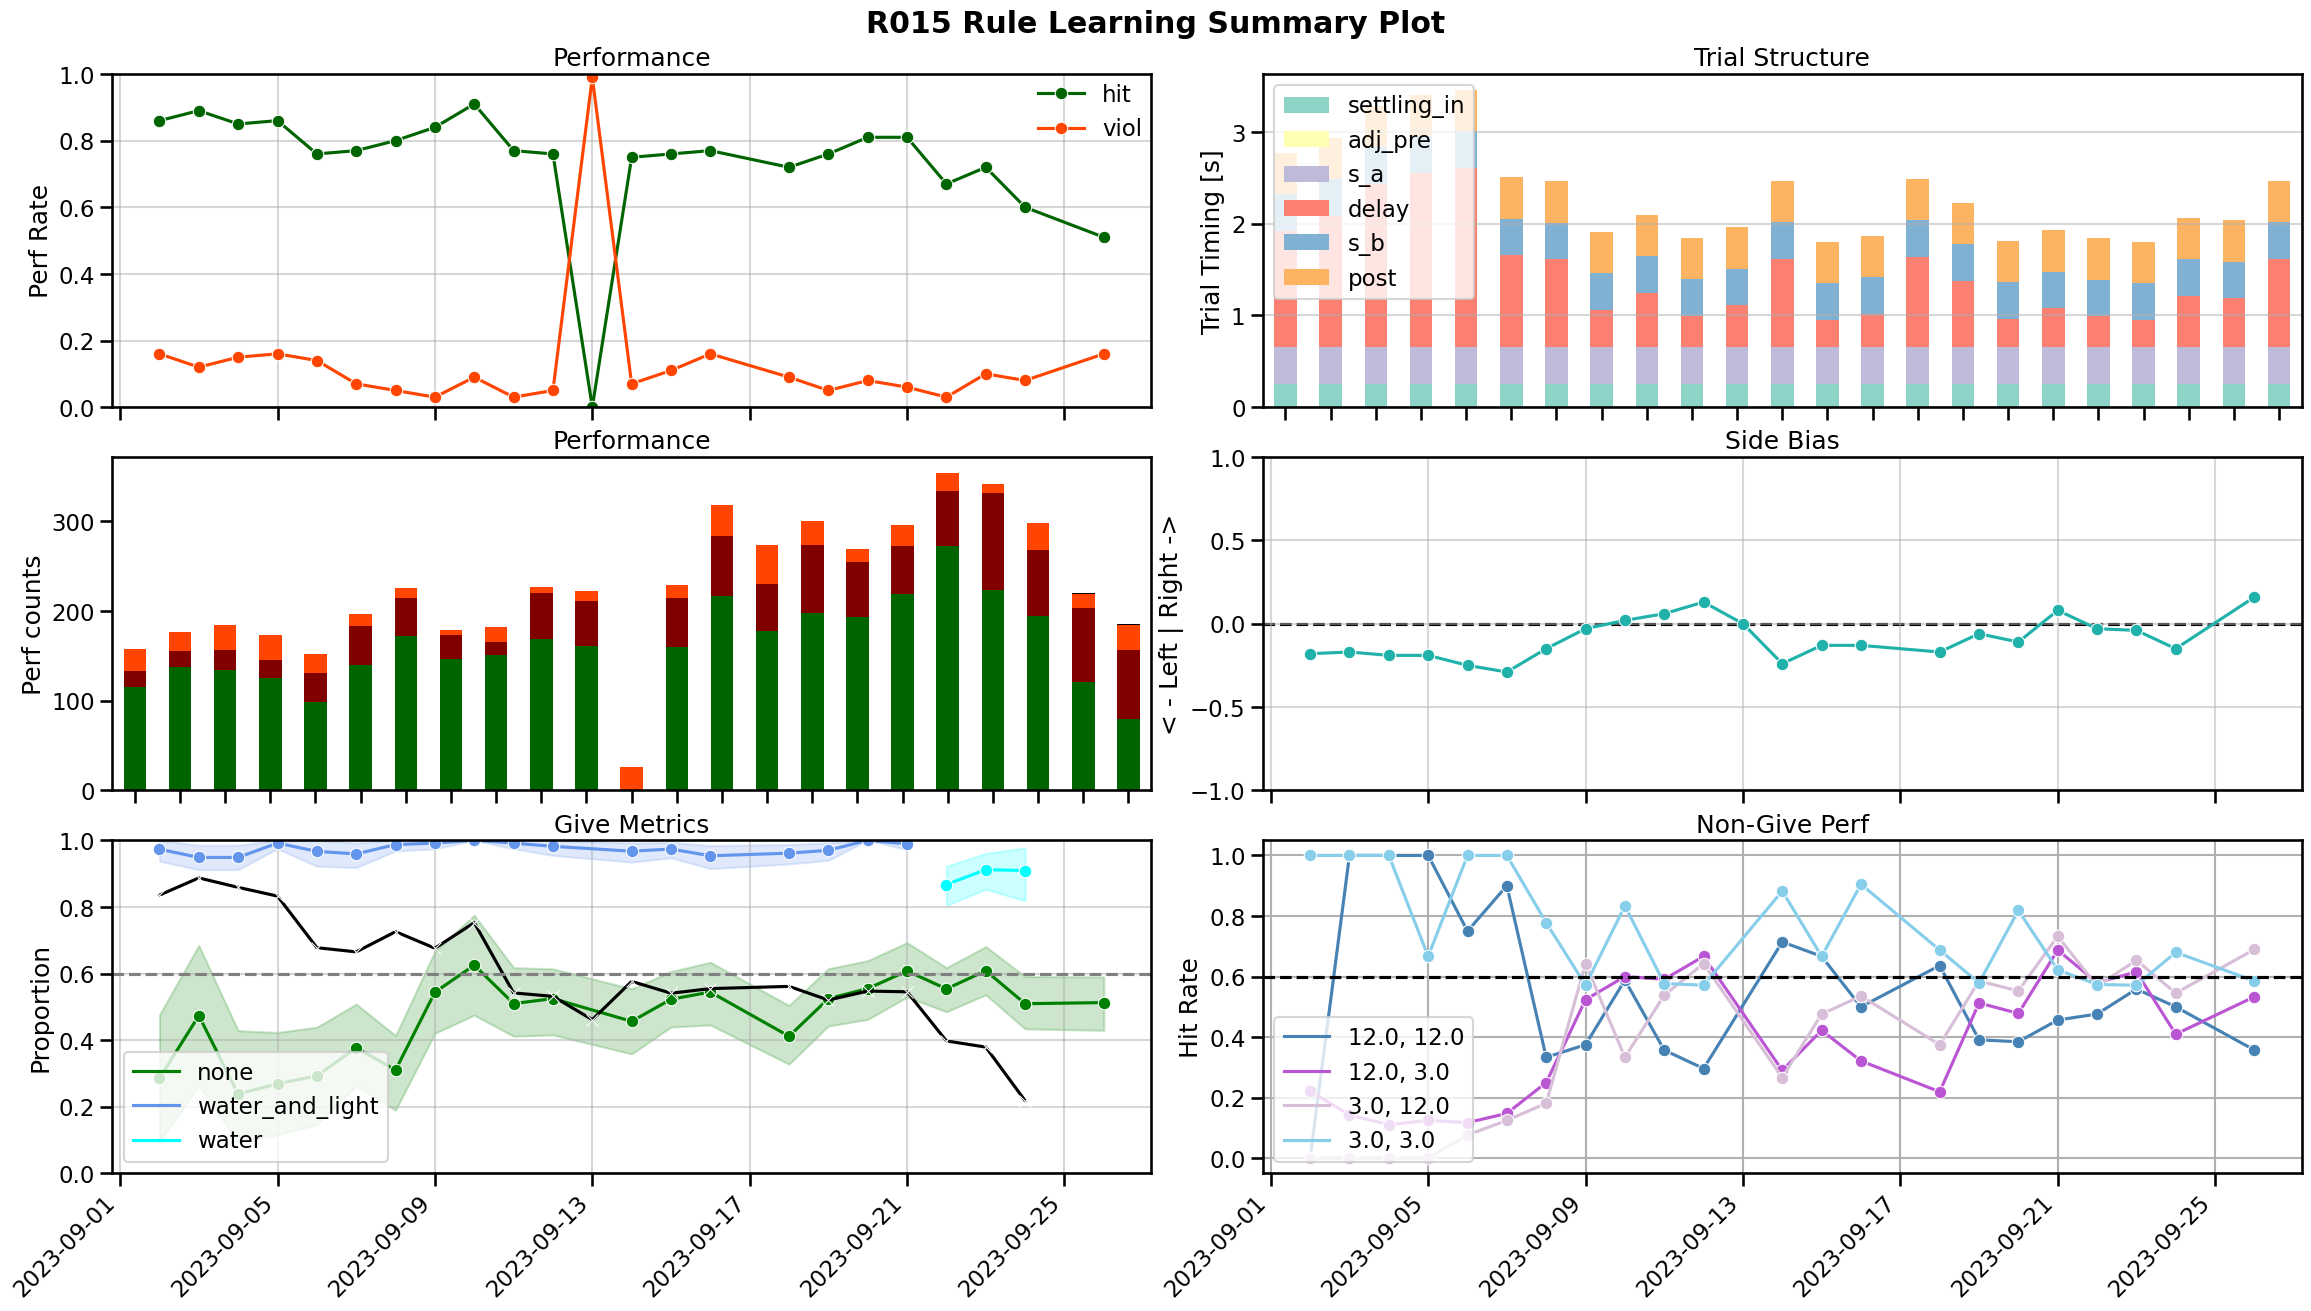

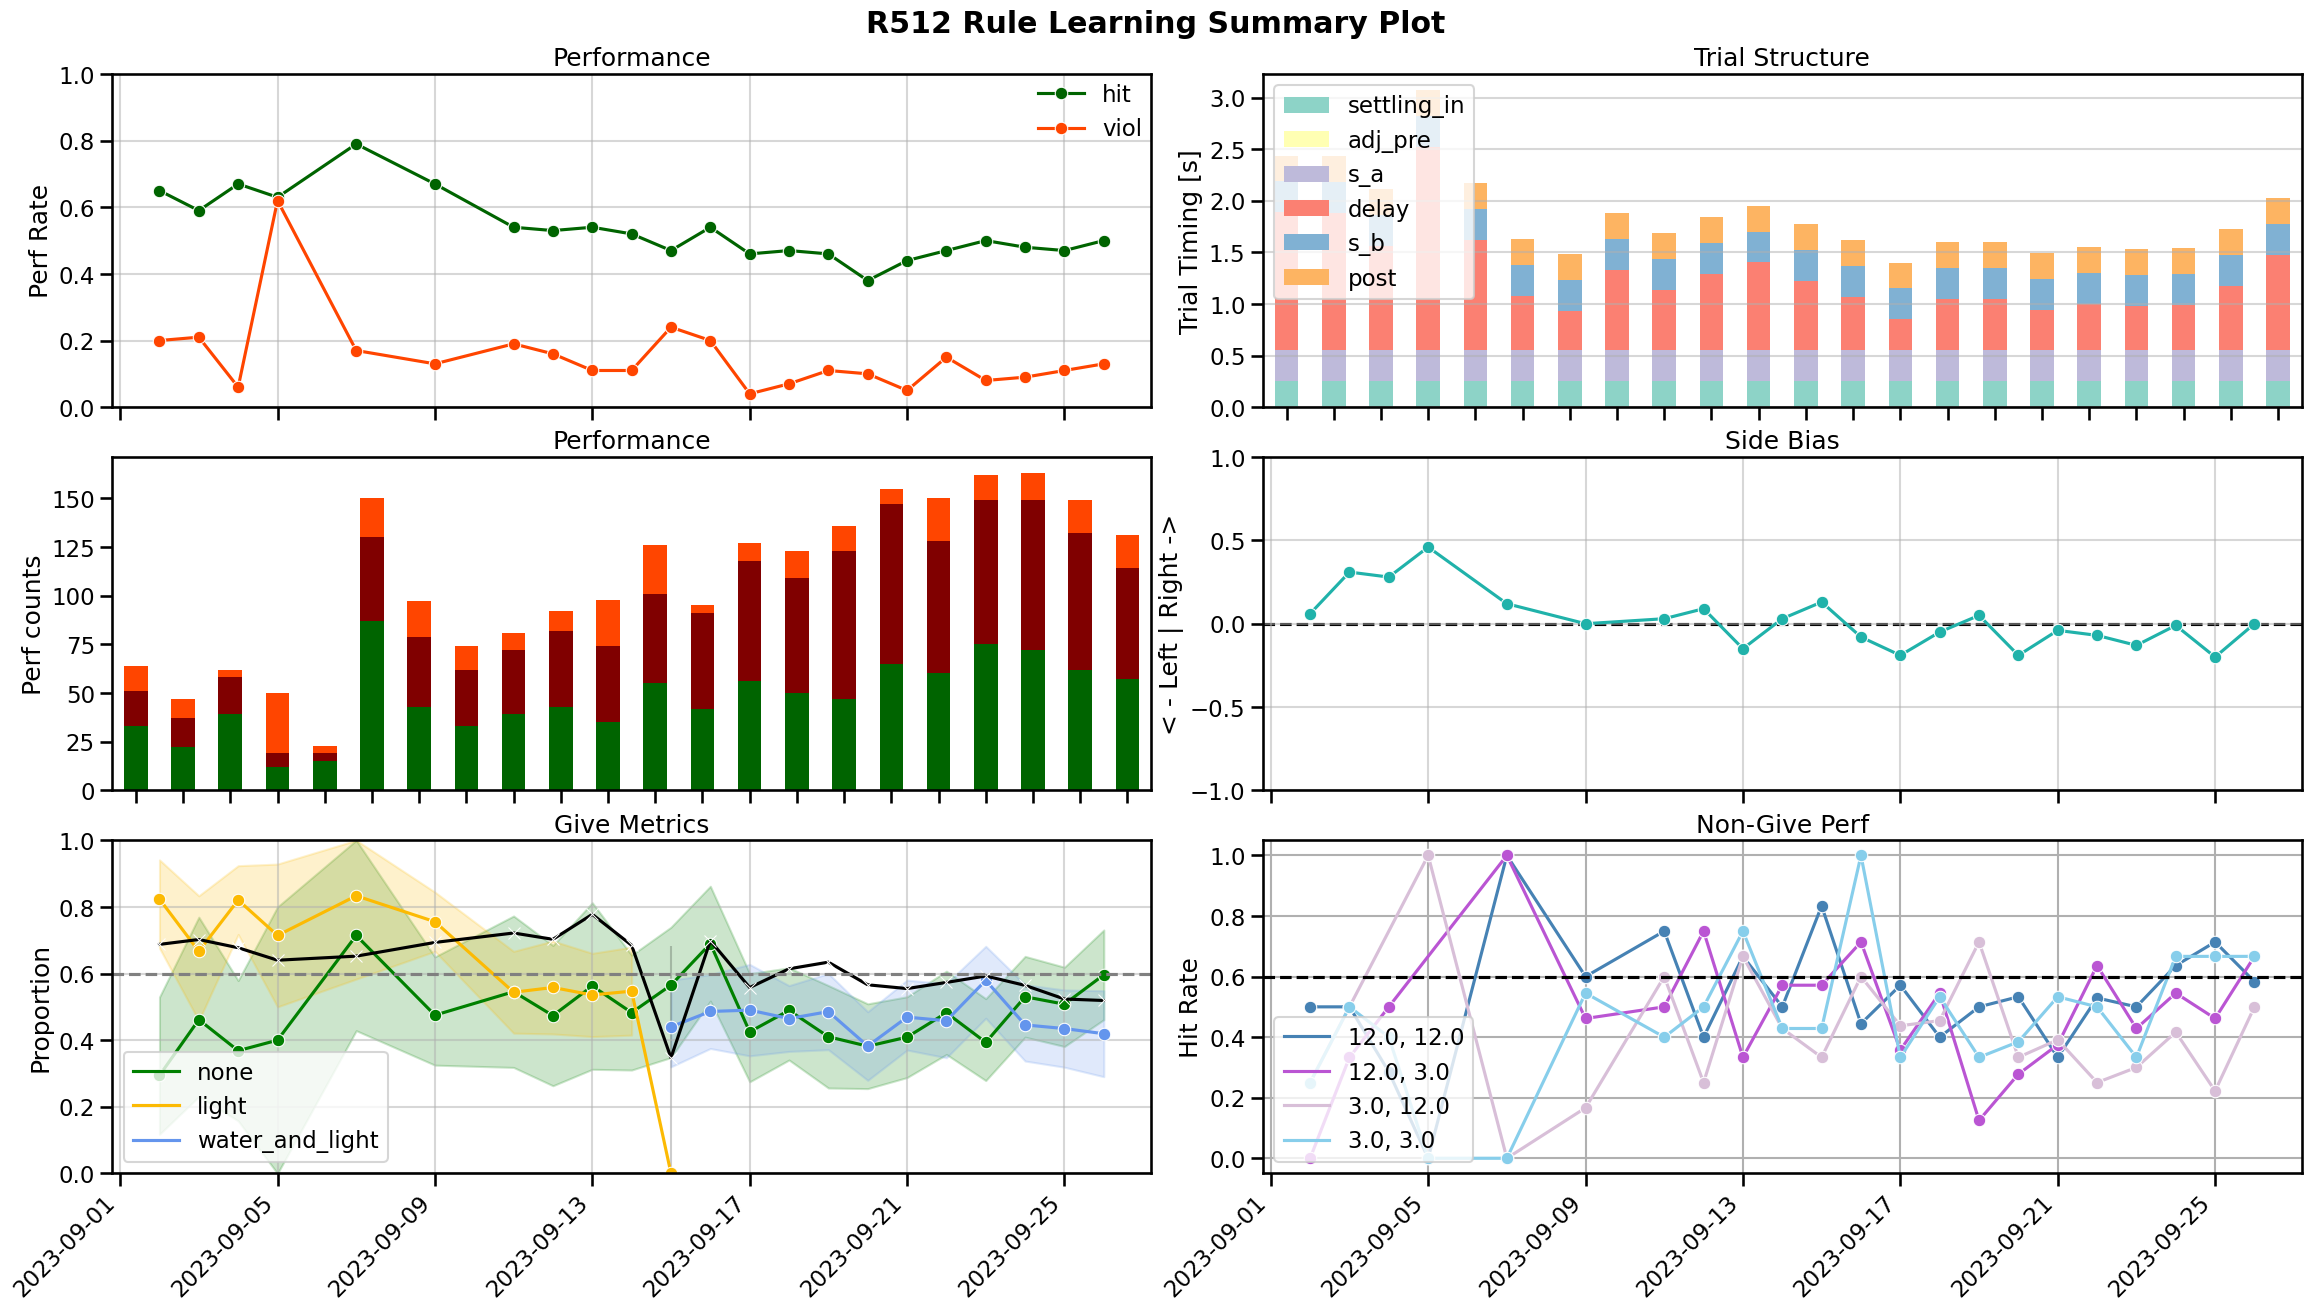

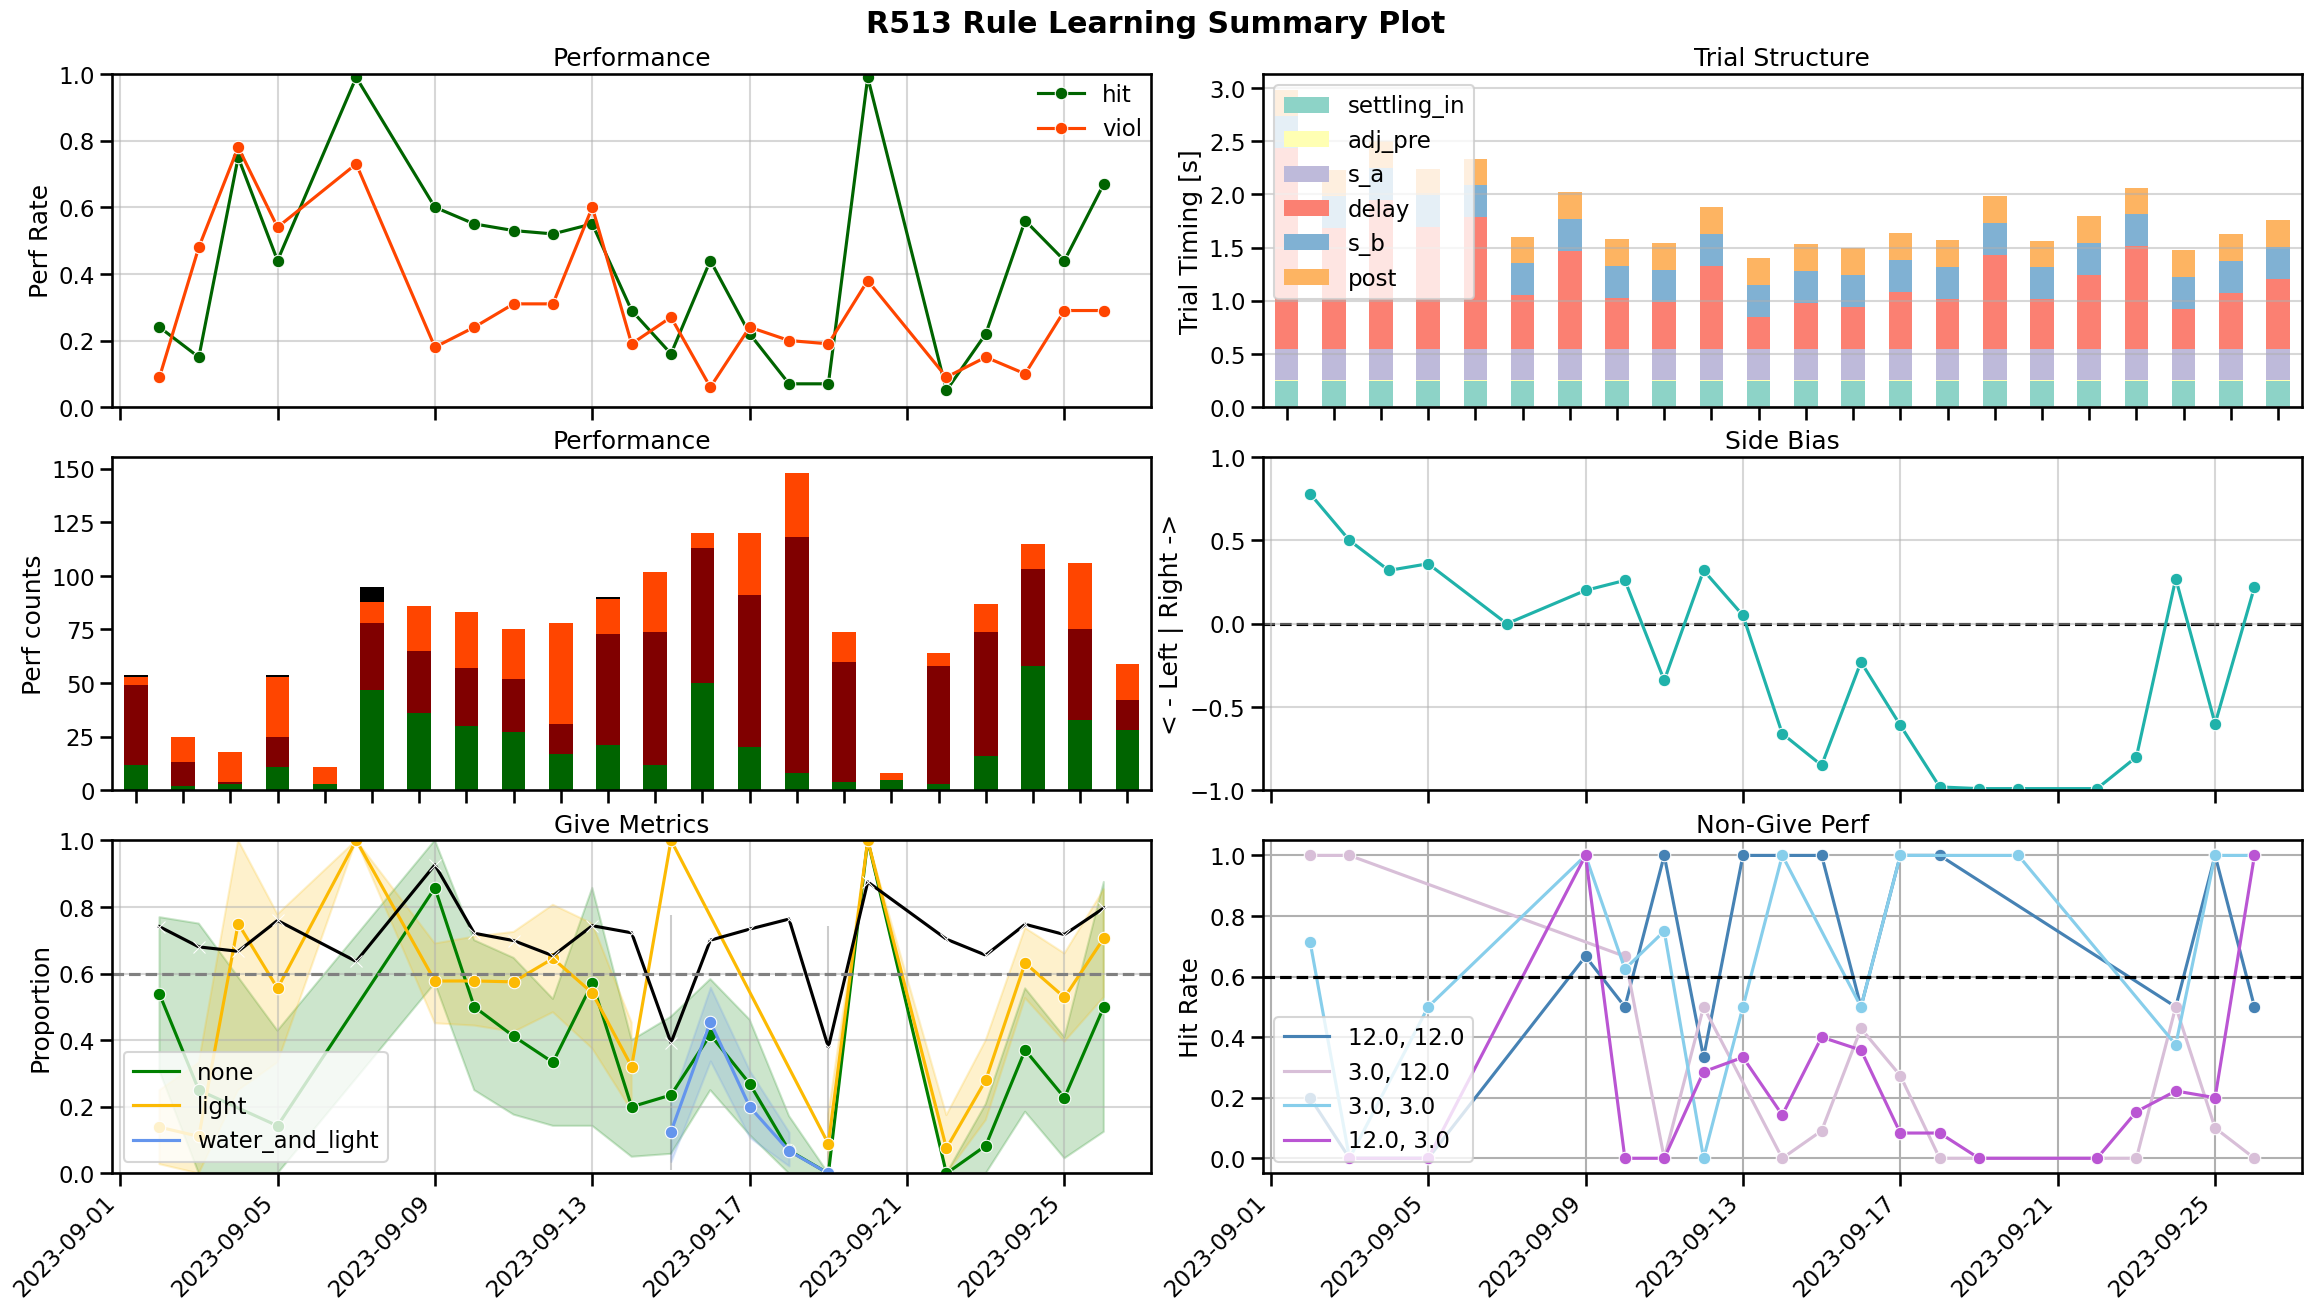

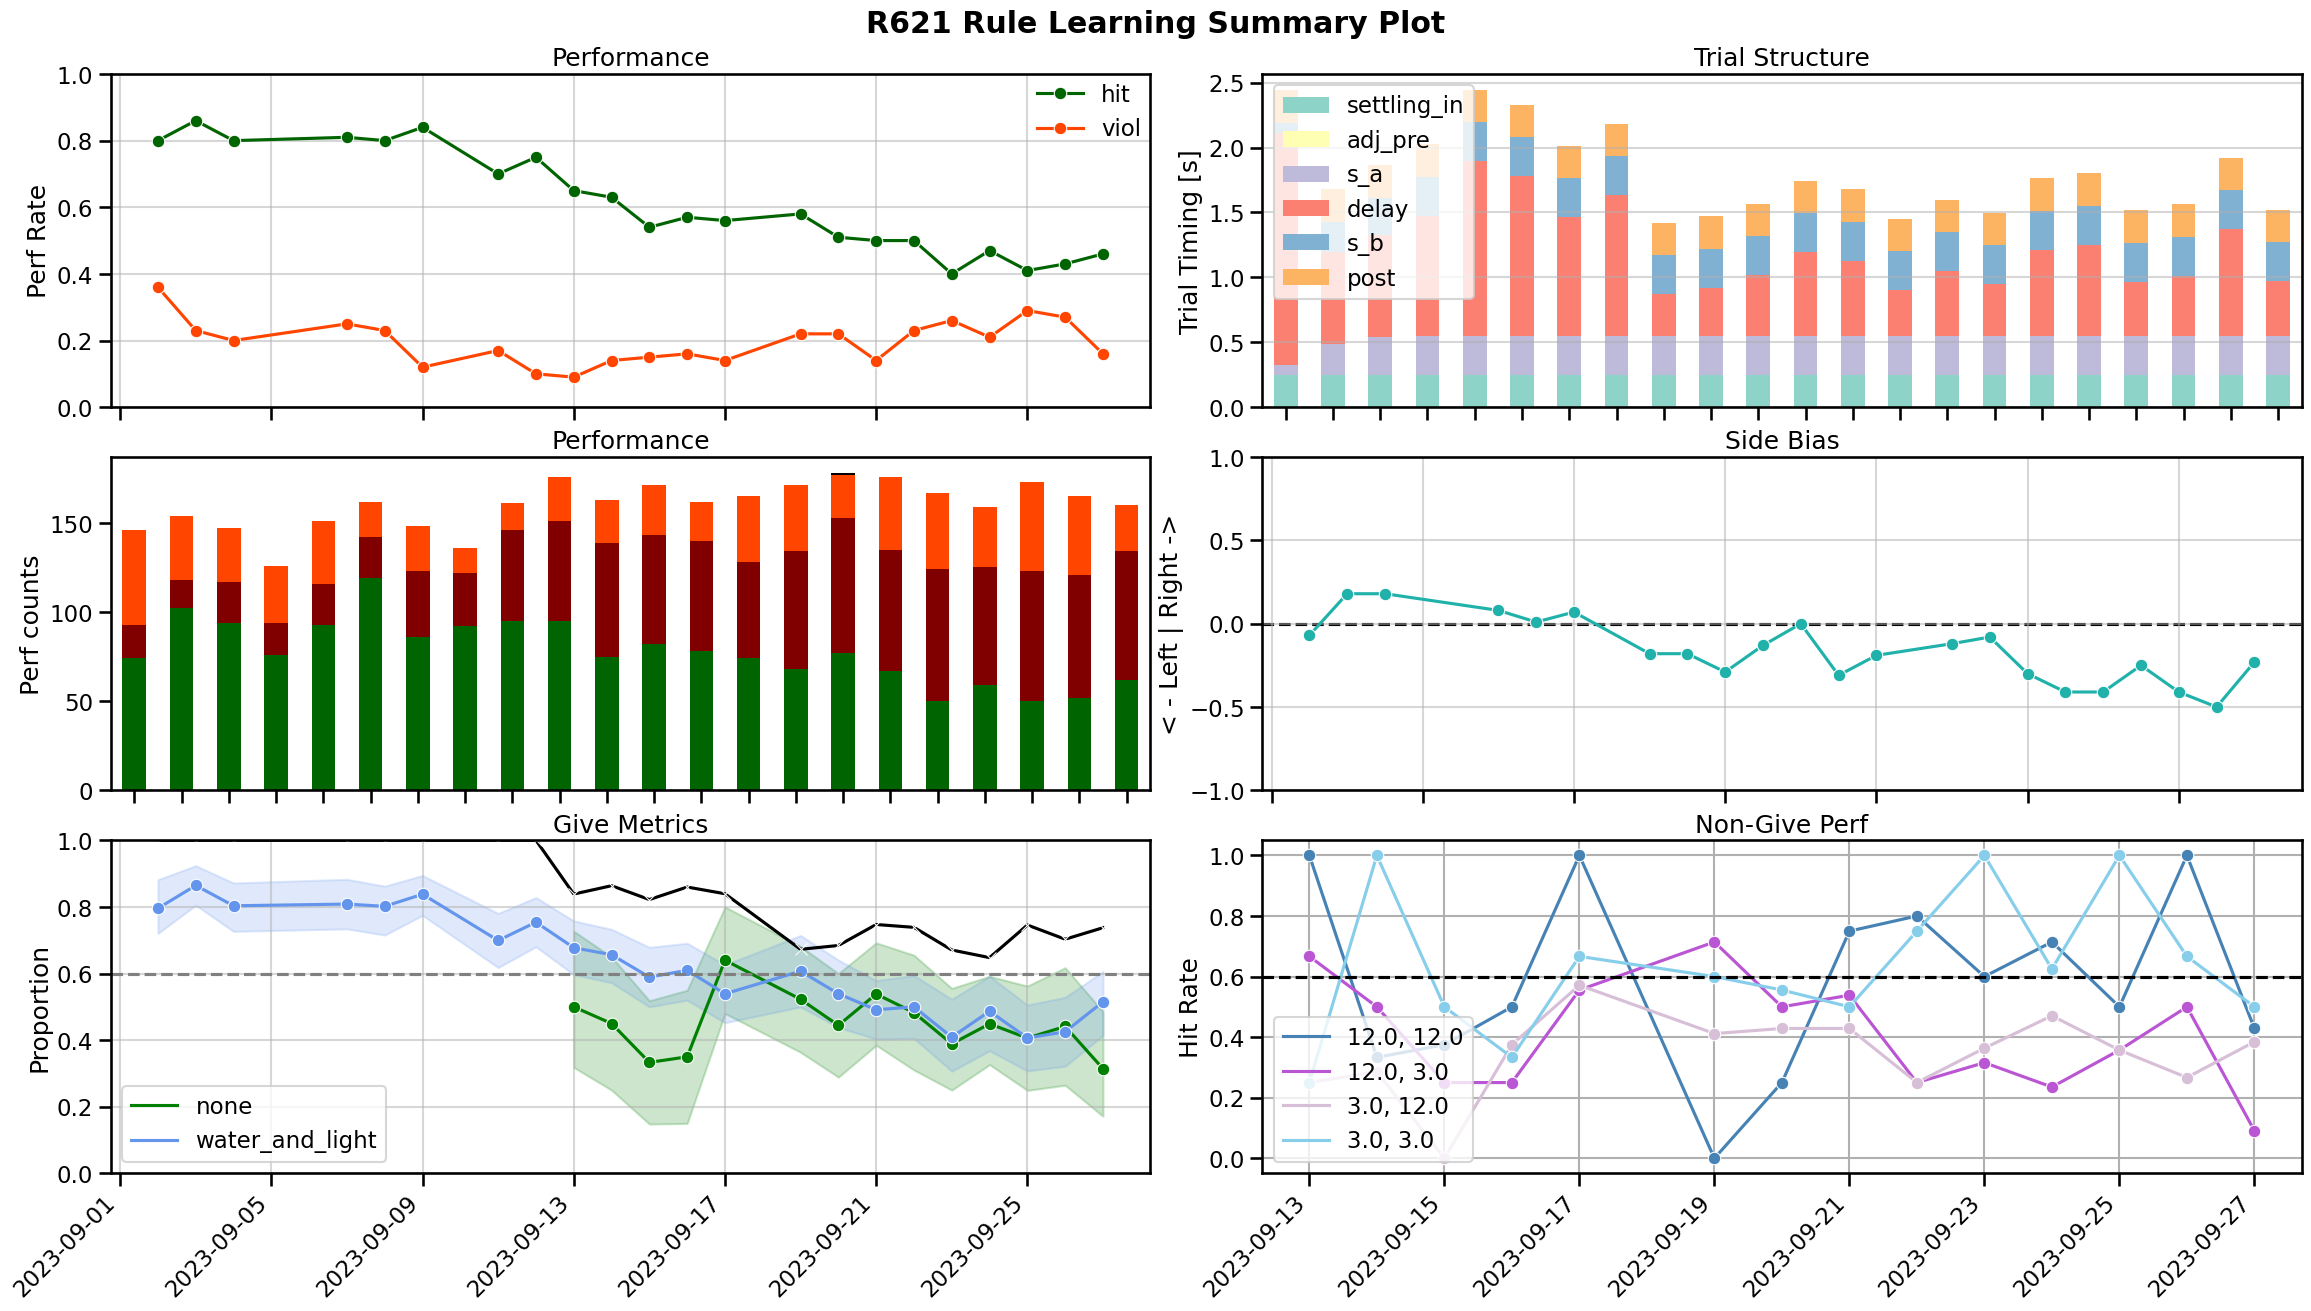

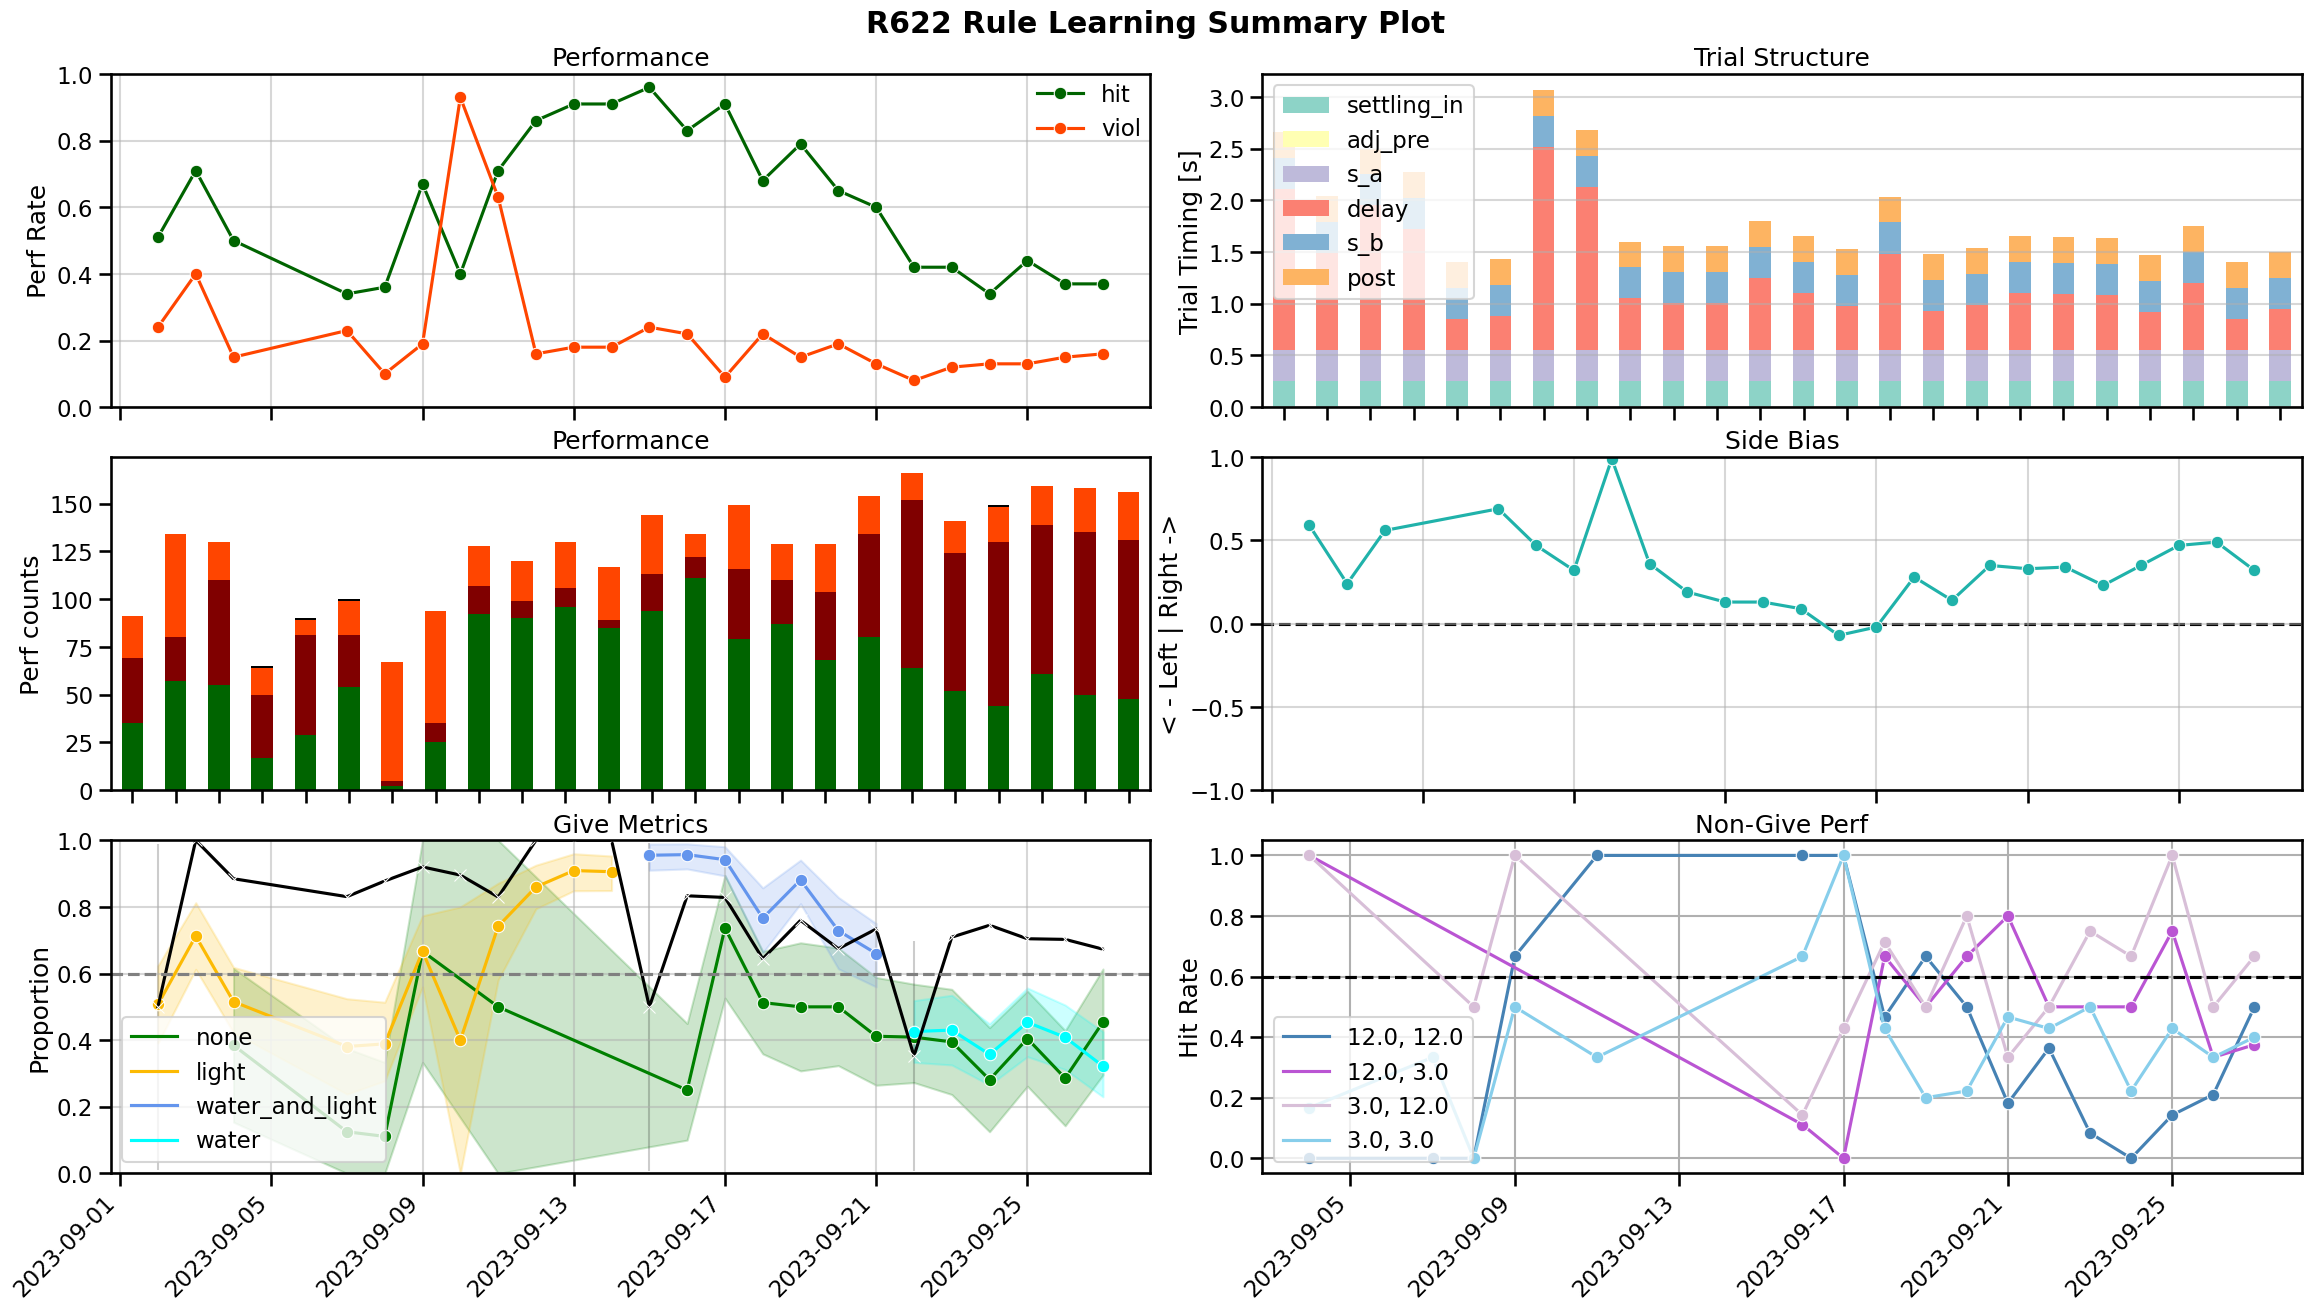

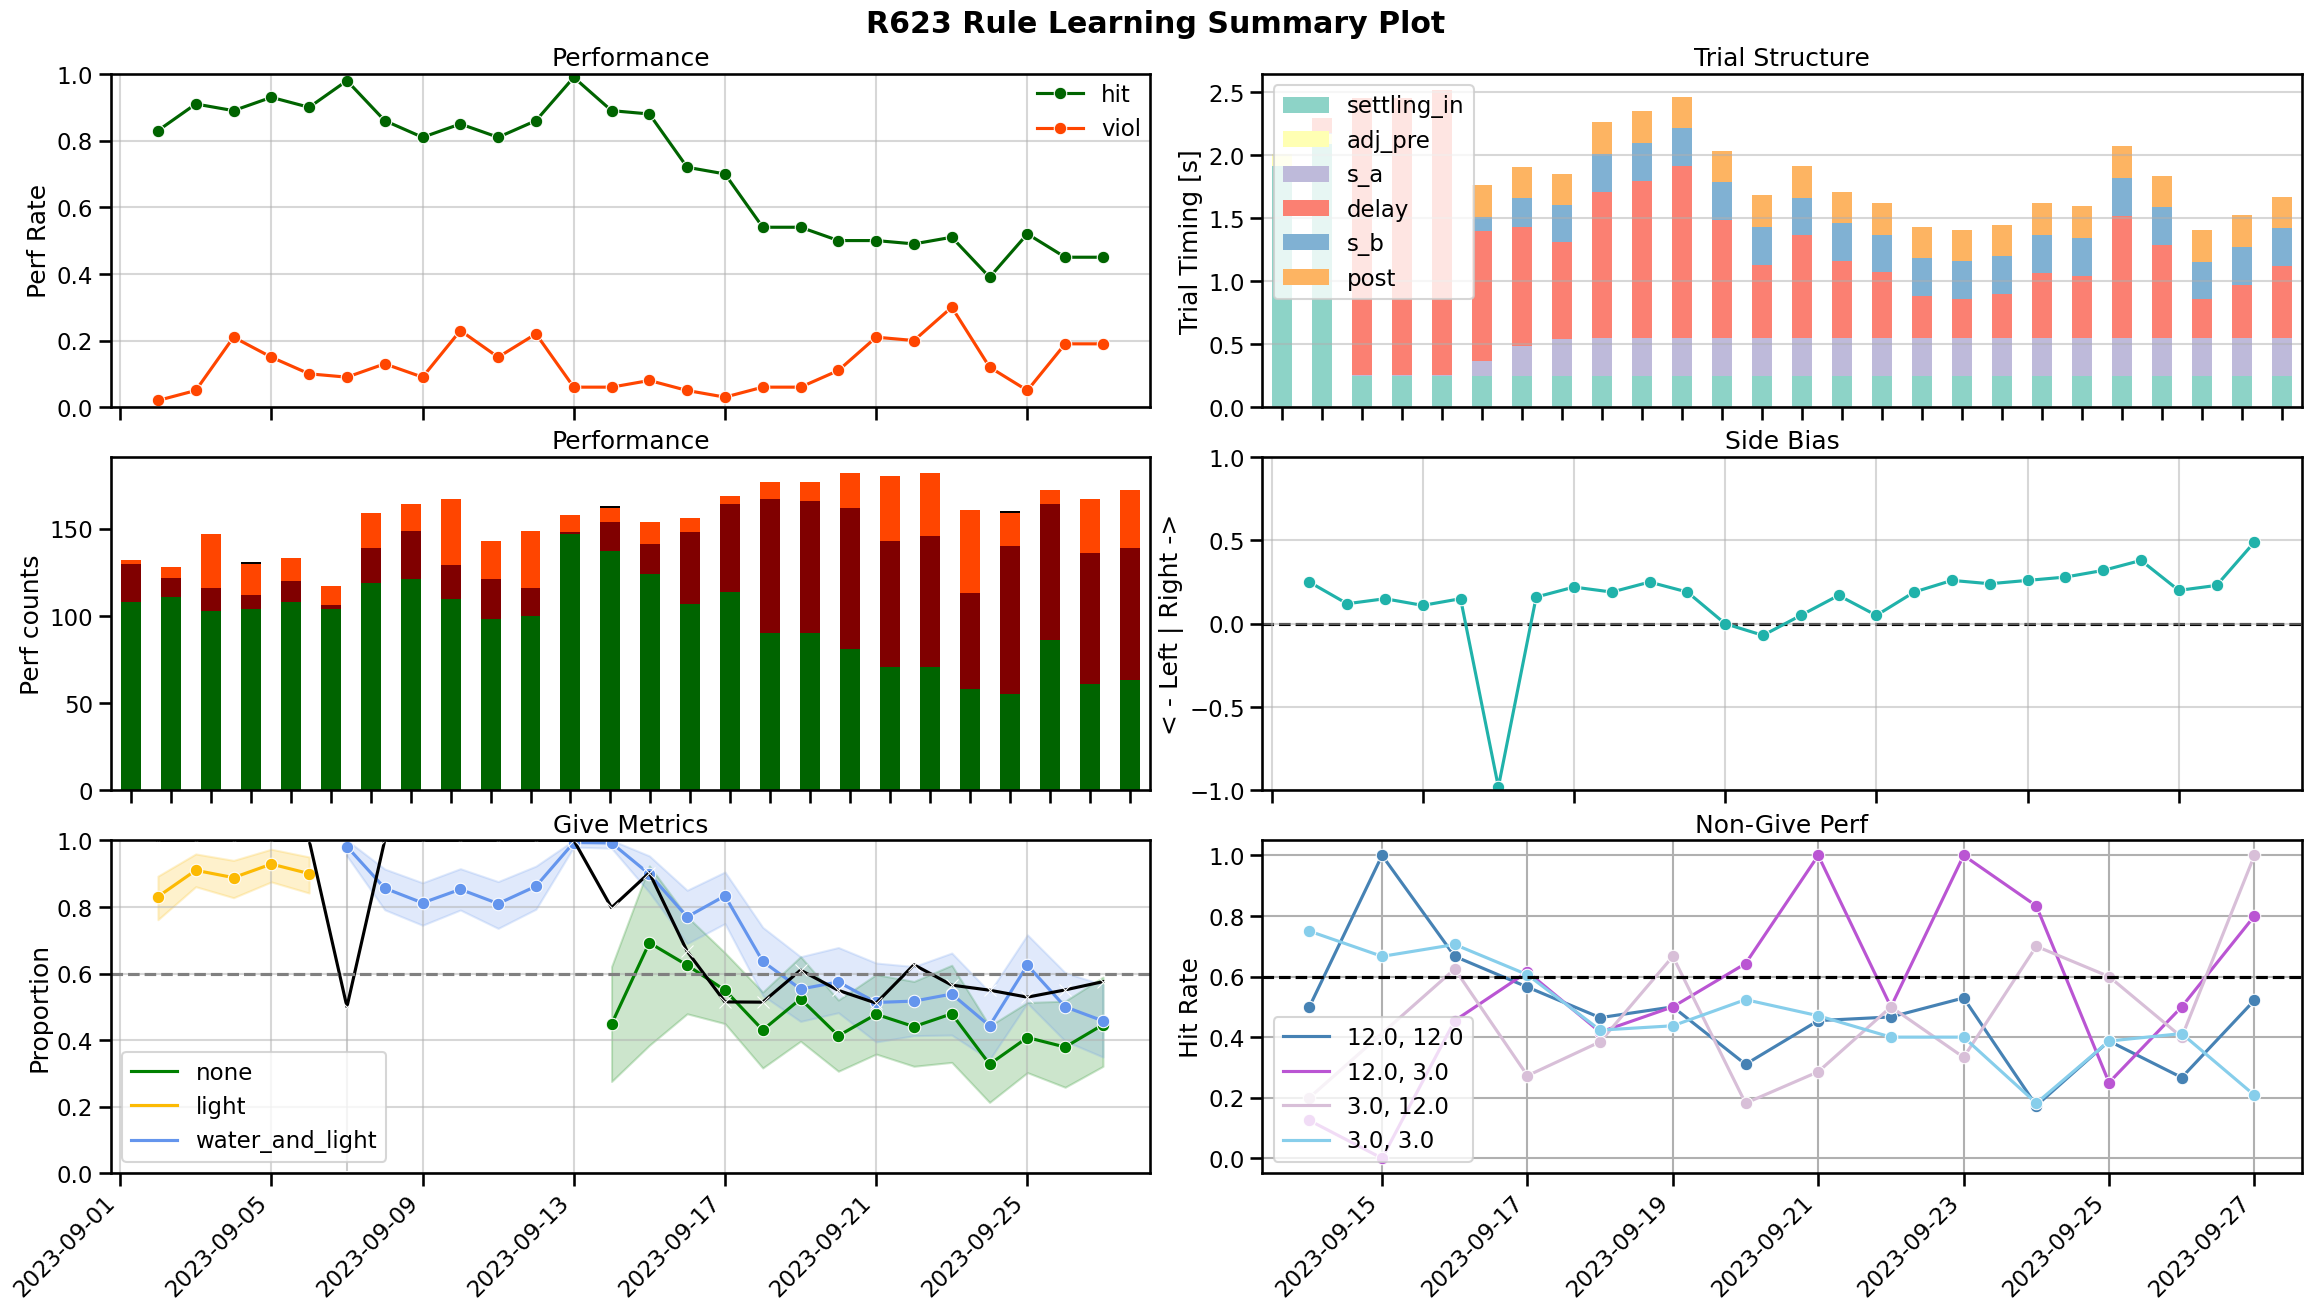

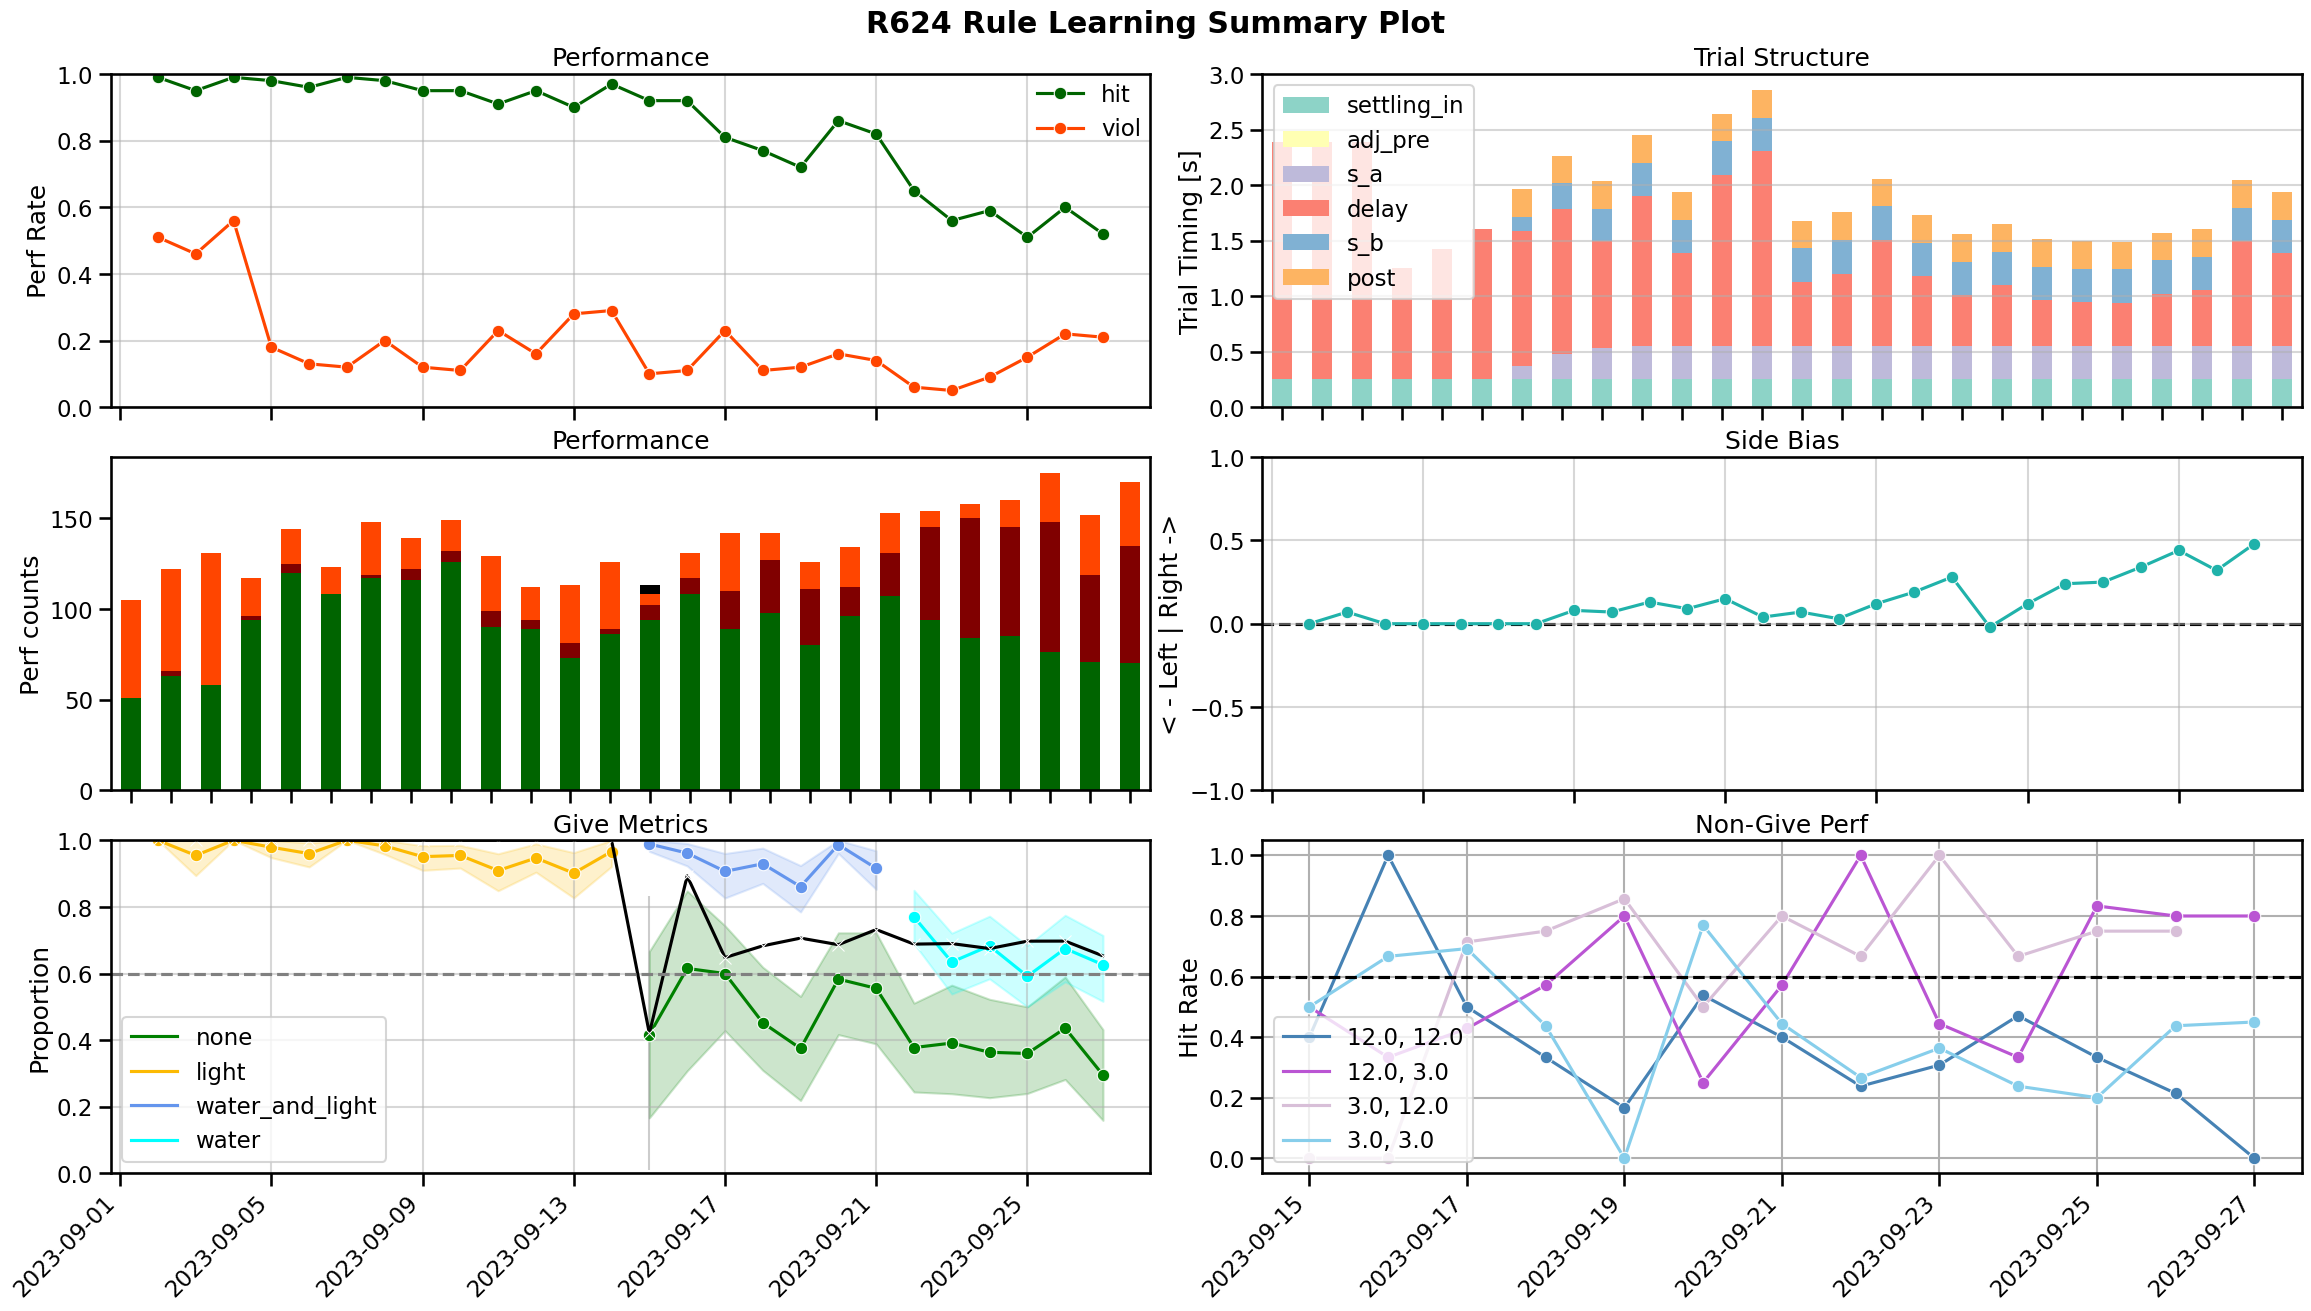

In [36]:
for animal_id, _ in days_df.groupby("animal_id"):
    mutliplot_rule_learning(animal_id, days_df, trials_df)